Author: Johanes Paulus Bernard Purek - March 2025

# **HOME CREDIT SCORECARD MODEL**

**Problem Background**

Access to credit is a crucial factor in financial inclusion(especially at Home Credit Indonesia), yet many individuals struggle to obtain loans due to insufficient or non-existent credit histories. Traditional credit scoring methods often fail to assess the repayment abilities of individuals who lack formal financial records. To address this gap, i help Home Credit Indonesia through this project by leverages statistical techniques and Machine Learning (ML) models to predict and assess their customers loan repayment capabilities. By incorporating the given data sources, i can ensure Home Credit Indonesia that creditworthy clients are not unjustly rejected and that loan offerings are structured in a way that supports client success(by doing a little bit of additional background checking for some customers).

**Goals and Objective**

1. Identify key characteristics of clients likely to face repayment difficulties.

2. Develop predictive models to assess clients' repayment abilities.

3. Ensure fair and data-driven loan approval decisions.

4. Provide actionable insights to improve loan structuring and customer experience.

**Actions and Metrics**

1. Data Exploration & Preprocessing: Clean and visualize data to extract meaningful business insights.  
Metric: Completeness and accuracy of preprocessed data.

2. Model Development & Evaluation: Build at least two machine learning models, including Logistic Regression, to predict repayment risk. Compare their performance to identify the best approach.   
Metric: Accuracy, ROC-AUC score, and Confusion Matrix analysis.

3. Business Recommendations: Provide insights on how Home Credit can improve loan approvals while minimizing risk.  
Metric: Feasibility and impact of proposed strategies.

# **Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

# **Load Dataset Train**

In [ ]:
df_train = pd.read_csv("/content/sample_data/application_train.csv")
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [ ]:
df_train.shape

(307511, 122)

In [ ]:
for col in df_train.columns:
    print(f"column {col}")

df_train.dtypes.value_counts()

column SK_ID_CURR
column TARGET
column NAME_CONTRACT_TYPE
column CODE_GENDER
column FLAG_OWN_CAR
column FLAG_OWN_REALTY
column CNT_CHILDREN
column AMT_INCOME_TOTAL
column AMT_CREDIT
column AMT_ANNUITY
column AMT_GOODS_PRICE
column NAME_TYPE_SUITE
column NAME_INCOME_TYPE
column NAME_EDUCATION_TYPE
column NAME_FAMILY_STATUS
column NAME_HOUSING_TYPE
column REGION_POPULATION_RELATIVE
column DAYS_BIRTH
column DAYS_EMPLOYED
column DAYS_REGISTRATION
column DAYS_ID_PUBLISH
column OWN_CAR_AGE
column FLAG_MOBIL
column FLAG_EMP_PHONE
column FLAG_WORK_PHONE
column FLAG_CONT_MOBILE
column FLAG_PHONE
column FLAG_EMAIL
column OCCUPATION_TYPE
column CNT_FAM_MEMBERS
column REGION_RATING_CLIENT
column REGION_RATING_CLIENT_W_CITY
column WEEKDAY_APPR_PROCESS_START
column HOUR_APPR_PROCESS_START
column REG_REGION_NOT_LIVE_REGION
column REG_REGION_NOT_WORK_REGION
column LIVE_REGION_NOT_WORK_REGION
column REG_CITY_NOT_LIVE_CITY
column REG_CITY_NOT_WORK_CITY
column LIVE_CITY_NOT_WORK_CITY
column ORGANIZATION_

float64    65
int64      41
object     16
Name: count, dtype: int64

In [ ]:
df_train.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  ...  \
count               307511.000000  307511.000000  307511.000000  ...   
mean                     0.020868  -16036.995067   63815.045904  ...   
std                      0.013831    4363.988632  141275.766519  ...   
min                      0.000290  -25229.000000  -17912.000000  ...   
25%                      0.010006  -19682.000000   -2760.000000  ...   
50%                      0.018850  -15750.000000   -1213.000000  ...   
75%                      0.028663  -12413.000000    -289.000000  ...   
max                      0.072508   -7489.000000  365243.000000  ...   

       FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
count     307511.000000     307511.000000     307511.000000     307511.000000   
mean           0.008130          0.000595          0.000507          0.000335   
std            0.089798          0.024387          0.022518          0.018299   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max            1.000000          1.000000          1.000000          1.000000   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               265992.000000              265992.000000   
mean                     0.006402                   0.007000   
std                      0.083849                   0.110757   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               265992.000000              265992.000000   
mean                     0.034362                   0.267395   
std                      0.204685                   0.916002   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              265992.000000               265992.000000  
mean                    0.265474                    1.899974  
std                     0.794056                    1.869295  
min                     0.000000                    0.000000  
25%              

In [ ]:
df_train['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [ ]:
df_train_copy = df_train.copy()

# **Checking Missing Values**

In [ ]:
# Calculate missing value percentage
missing_value_perc = (df_train_copy.isnull().sum()/df_train_copy.shape[0]) * 100
missing_value_perc

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [ ]:
# Filtered column with missing value percentage more than 50%
filtering = missing_value_perc > 50.0
filtered_values = filtering[filtering]
filtered_values

OWN_CAR_AGE                 True
EXT_SOURCE_1                True
APARTMENTS_AVG              True
BASEMENTAREA_AVG            True
YEARS_BUILD_AVG             True
COMMONAREA_AVG              True
ELEVATORS_AVG               True
ENTRANCES_AVG               True
FLOORSMIN_AVG               True
LANDAREA_AVG                True
LIVINGAPARTMENTS_AVG        True
LIVINGAREA_AVG              True
NONLIVINGAPARTMENTS_AVG     True
NONLIVINGAREA_AVG           True
APARTMENTS_MODE             True
BASEMENTAREA_MODE           True
YEARS_BUILD_MODE            True
COMMONAREA_MODE             True
ELEVATORS_MODE              True
ENTRANCES_MODE              True
FLOORSMIN_MODE              True
LANDAREA_MODE               True
LIVINGAPARTMENTS_MODE       True
LIVINGAREA_MODE             True
NONLIVINGAPARTMENTS_MODE    True
NONLIVINGAREA_MODE          True
APARTMENTS_MEDI             True
BASEMENTAREA_MEDI           True
YEARS_BUILD_MEDI            True
COMMONAREA_MEDI             True
ELEVATORS_MEDI              True
ENTRANCES_MEDI              True
FLOORSMIN_MEDI              True
LANDAREA_MEDI               True
LIVINGAPARTMENTS_MEDI       True
LIVINGAREA_MEDI             True
NONLIVINGAPARTMENTS_MEDI    True
NONLIVINGAREA_MEDI          True
FONDKAPREMONT_MODE          True
HOUSETYPE_MODE              True
WALLSMATERIAL_MODE          True
dtype: bool

In [ ]:
filtered_values.count()

np.int64(41)

In [ ]:
# Filtered and describe the numerical column
filtered_columns = filtered_values.index.tolist()

filtered_numerical = [col for col in filtered_columns if df_train_copy[col].dtype != 'O']

df_train[filtered_numerical].describe().T

count       mean        std       min       25%  \
OWN_CAR_AGE               104582.0  12.061091  11.944812  0.000000  5.000000   
EXT_SOURCE_1              134133.0   0.502130   0.211062  0.014568  0.334007   
APARTMENTS_AVG            151450.0   0.117440   0.108240  0.000000  0.057700   
BASEMENTAREA_AVG          127568.0   0.088442   0.082438  0.000000  0.044200   
YEARS_BUILD_AVG           103023.0   0.752471   0.113280  0.000000  0.687200   
COMMONAREA_AVG             92646.0   0.044621   0.076036  0.000000  0.007800   
ELEVATORS_AVG             143620.0   0.078942   0.134576  0.000000  0.000000   
ENTRANCES_AVG             152683.0   0.149725   0.100049  0.000000  0.069000   
FLOORSMIN_AVG              98869.0   0.231894   0.161380  0.000000  0.083300   
LANDAREA_AVG              124921.0   0.066333   0.081184  0.000000  0.018700   
LIVINGAPARTMENTS_AVG       97312.0   0.100775   0.092576  0.000000  0.050400   
LIVINGAREA_AVG            153161.0   0.107399   0.110565  0.000000  0.045300   
NONLIVINGAPARTMENTS_AVG    93997.0   0.008809   0.047732  0.000000  0.000000   
NONLIVINGAREA_AVG         137829.0   0.028358   0.069523  0.000000  0.000000   
APARTMENTS_MODE           151450.0   0.114231   0.107936  0.000000  0.052500   
BASEMENTAREA_MODE         127568.0   0.087543   0.084307  0.000000  0.040700   
YEARS_BUILD_MODE          103023.0   0.759637   0.110111  0.000000  0.699400   
COMMONAREA_MODE            92646.0   0.042553   0.074445  0.000000  0.007200   
ELEVATORS_MODE            143620.0   0.074490   0.132256  0.000000  0.000000   
ENTRANCES_MODE            152683.0   0.145193   0.100977  0.000000  0.069000   
FLOORSMIN_MODE             98869.0   0.228058   0.161160  0.000000  0.083300   
LANDAREA_MODE             124921.0   0.064958   0.081750  0.000000  0.016600   
LIVINGAPARTMENTS_MODE      97312.0   0.105645   0.097880  0.000000  0.054200   
LIVINGAREA_MODE           153161.0   0.105975   0.111845  0.000000  0.042700   
NONLIVINGAPARTMENTS_MODE   93997.0   0.008076   0.046276  0.000000  0.000000   
NONLIVINGAREA_MODE        137829.0   0.027022   0.070254  0.000000  0.000000   
APARTMENTS_MEDI           151450.0   0.117850   0.109076  0.000000  0.058300   
BASEMENTAREA_MEDI         127568.0   0.087955   0.082179  0.000000  0.043700   
YEARS_BUILD_MEDI          103023.0   0.755746   0.112066  0.000000  0.691400   
COMMONAREA_MEDI            92646.0   0.044595   0.076144  0.000000  0.007900   
ELEVATORS_MEDI            143620.0   0.078078   0.134467  0.000000  0.000000   
ENTRANCES_MEDI            152683.0   0.149213   0.100368  0.000000  0.069000   
FLOORSMIN_MEDI             98869.0   0.231625   0.161934  0.000000  0.083300   
LANDAREA_MEDI             124921.0   0.067169   0.082167  0.000000  0.018700   
LIVINGAPARTMENTS_MEDI      97312.0   0.101954   0.093642  0.000000  0.051300   
LIVINGAREA_MEDI           153161.0   0.108607   0.112260  0.000000  0.045700   
NONLIVINGAPARTMENTS_MEDI   93997.0   0.008651   0.047415  0.000000  0.000000   
NONLIVINGAREA_MEDI        137829.0   0.028236   0.070166  0.000000  0.000000   

                               50%        75%        max  
OWN_CAR_AGE               9.000000  15.000000  91.000000  
EXT_SOURCE_1              0.505998   0.675053   0.962693  
APARTMENTS_AVG            0.087600   0.148500   1.000000  
BASEMENTAREA_AVG          0.076300   0.112200   1.000000  
YEARS_BUILD_AVG           0.755200   0.823200   1.000000  
COMMONAREA_AVG            0.021100   0.051500   1.000000  
ELEVATORS_AVG             0.000000   0.120000   1.000000  
ENTRANCES_AVG             0.137900   0.206900   1.000000  
FLOORSMIN_AVG             0.208300   0.375000   1.000000  
LANDAREA_AVG              0.048100   0.085600   1.000000  
LIVINGAPARTMENTS_AVG      0.075600   0.121000   1.000000  
LIVINGAREA_AVG            0.074500   0.129900   1.000000  
NONLIVINGAPARTMENTS_AVG   0.000000   0.003900   1.000000  
NONLIVINGAREA_AVG         0.003600   0.027700   1.000000  
APARTMENTS_MODE        

In [ ]:
cols = ["OWN_CAR_AGE"] + [col for col in df_train_copy.columns if col != "OWN_CAR_AGE"]
df_train_copy = df_train_copy[cols]

df_train_copy[df_train_copy["OWN_CAR_AGE"].notna()].head(20)

OWN_CAR_AGE  SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER  \
2          26.0      100004       0    Revolving loans           M   
6          17.0      100009       0         Cash loans           F   
7           8.0      100010       0         Cash loans           M   
13         23.0      100017       0         Cash loans           M   
15         17.0      100019       0         Cash loans           M   
20          7.0      100024       0    Revolving loans           M   
21         14.0      100025       0         Cash loans           F   
24          7.0      100029       0         Cash loans           M   
28          1.0      100033       0         Cash loans           M   
33          3.0      100039       0         Cash loans           M   
39          3.0      100046       0    Revolving loans           M   
49          3.0      100056       0         Cash loans           M   
51          7.0      100059       0         Cash loans           M   
52         13.0      100060       0         Cash loans           M   
54          8.0      100062       0         Cash loans           M   
58         10.0      100069       0         Cash loans           M   
59          2.0      100070       0         Cash loans           M   
62         10.0      100073       0         Cash loans           M   
64          1.0      100076       0         Cash loans           M   
66         21.0      100078       0         Cash loans           F   

   FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
2             Y               Y             0           67500.0    135000.0   
6             Y               Y             1          171000.0   1560726.0   
7             Y               Y             0          360000.0   1530000.0   
13            Y               N             1          225000.0    918468.0   
15            Y               Y             0          157500.0    299772.0   
20            Y               Y             0          135000.0    427500.0   
21            Y               Y             1          202500.0   1132573.5   
24            Y               N             2          135000.0    247500.0   
28            Y               Y             0          270000.0    790830.0   
33            Y               N             1          360000.0    733315.5   
39            Y               Y             0          180000.0    540000.0   
49            Y               Y             0          360000.0   1506816.0   
51            Y               Y             1          540000.0    675000.0   
52            Y               N             0           76500.0    454500.0   
54            Y               N             0           81000.0    675000.0   
58            Y               Y             1          360000.0    640458.0   
59            Y               Y             0          540000.0   1227901.5   
62            Y               Y             0          324000.0   1130760.0   
64            Y               N             0          180000.0    315000.0   
66            Y               Y             0          180000.0   1035000.0   

    ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
2   ...                 0                 0                0                0   
6   ...                 0                 0                0                0   
7   ...                 0                 0                0                0   
13  ...                 0                 0                0                0   
15  ...                 0                 0                0                0   
20  ...                 0                 0                0                0   
21  ...                 0                 0                0                0   
24  ...                 0                 0                0                0   
28  ...                 0                 0                0                0   
33  ...                 0                 0                0   

<Figure size 1500x1000 with 0 Axes>

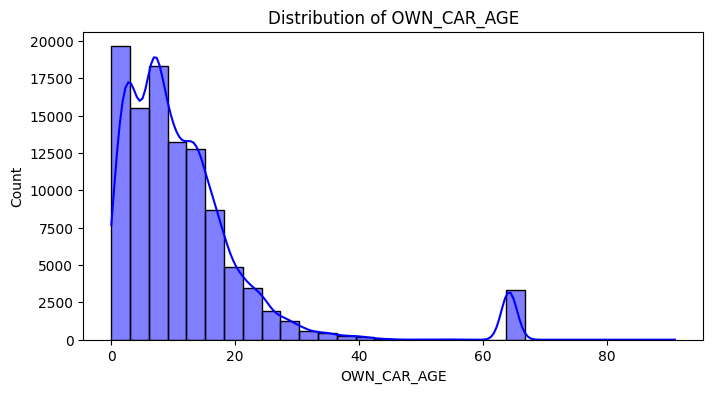

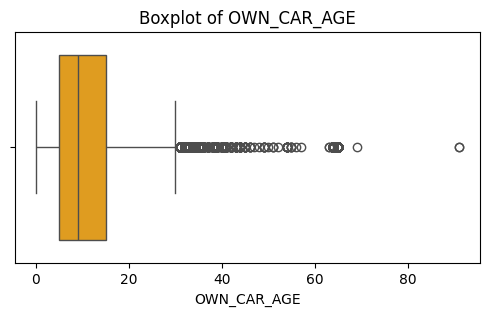

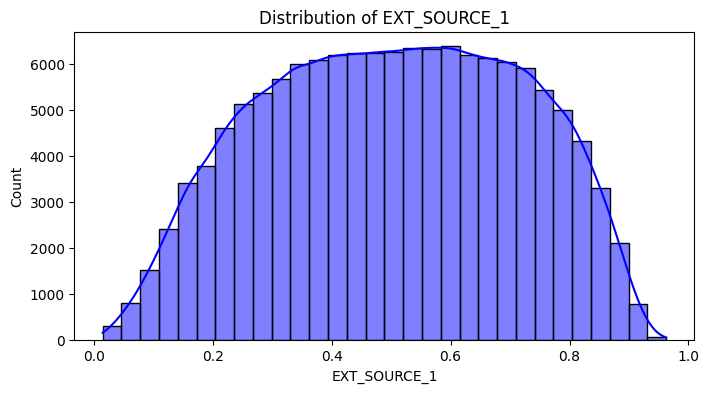

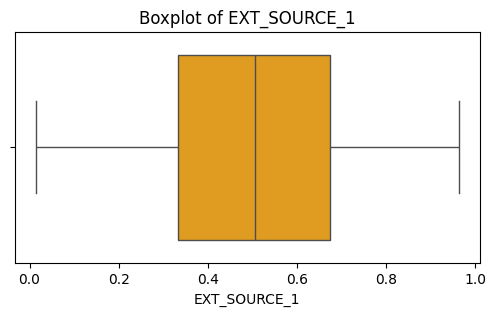

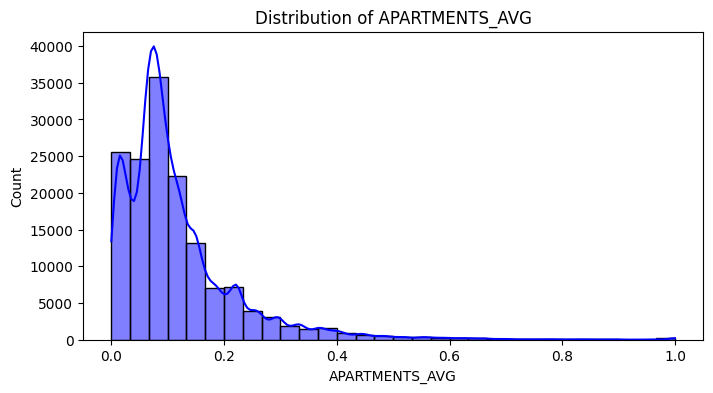

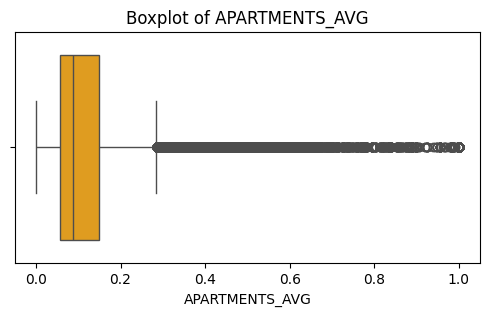

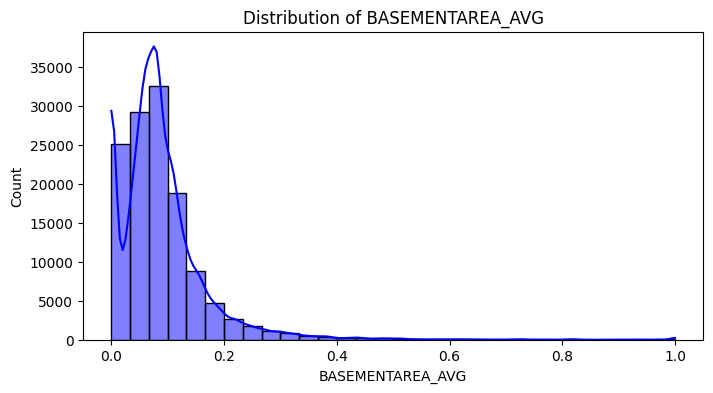

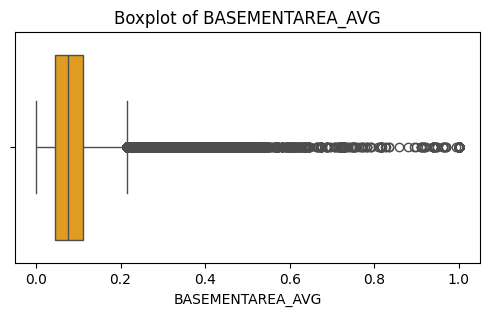

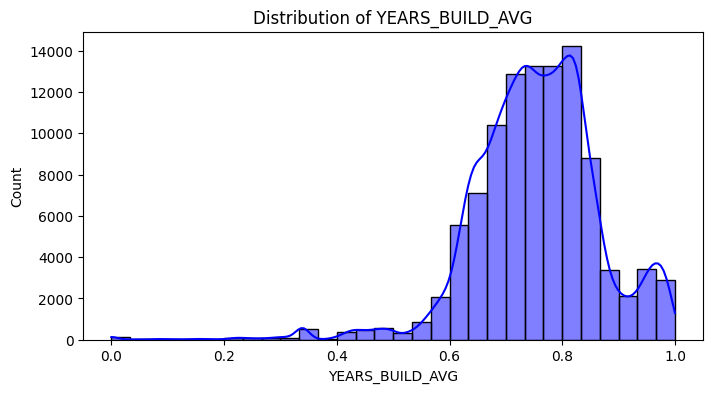

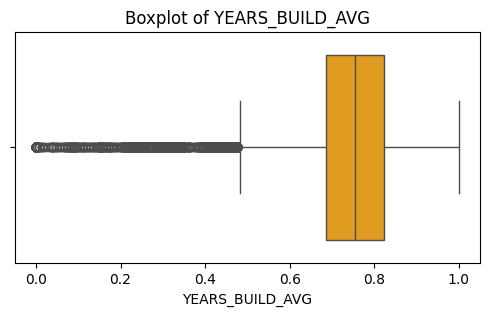

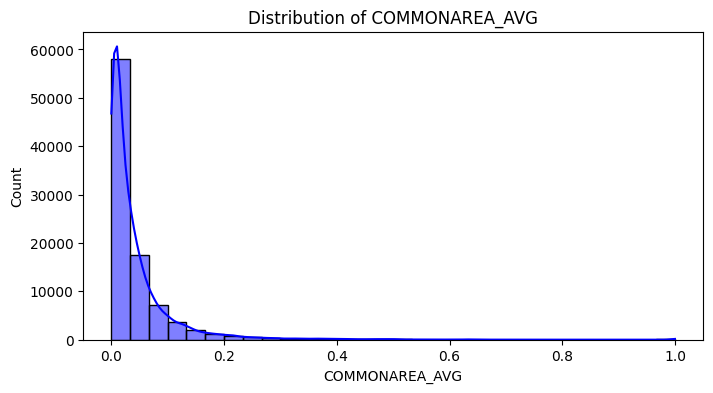

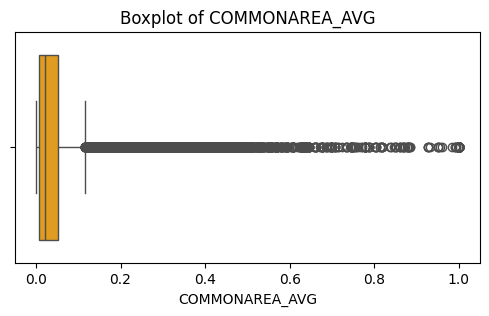

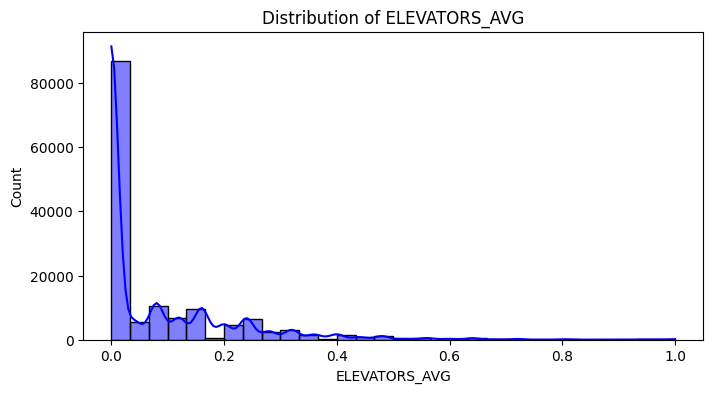

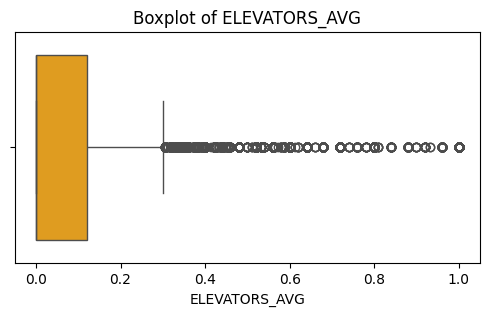

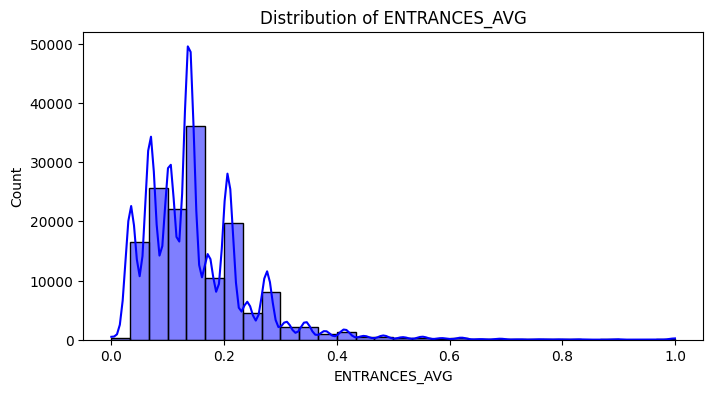

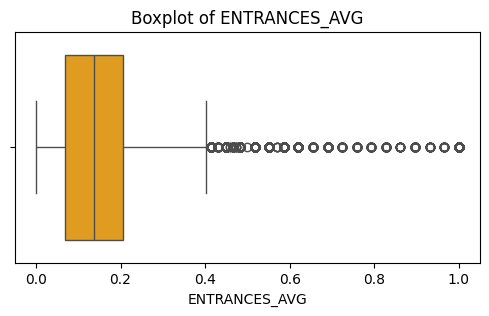

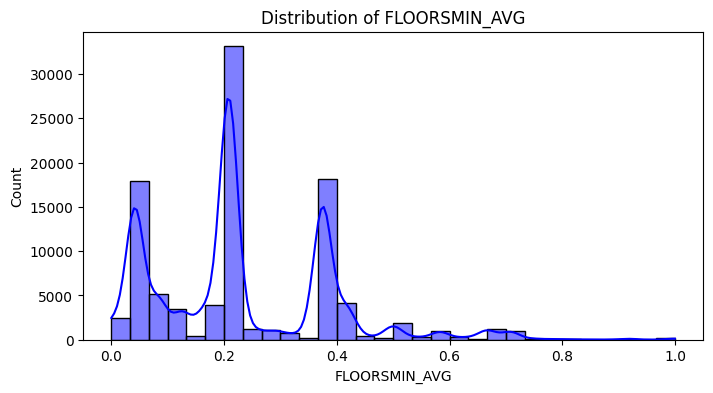

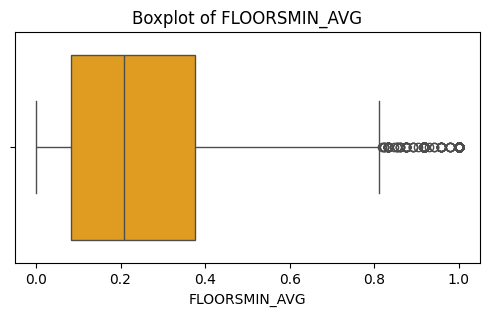

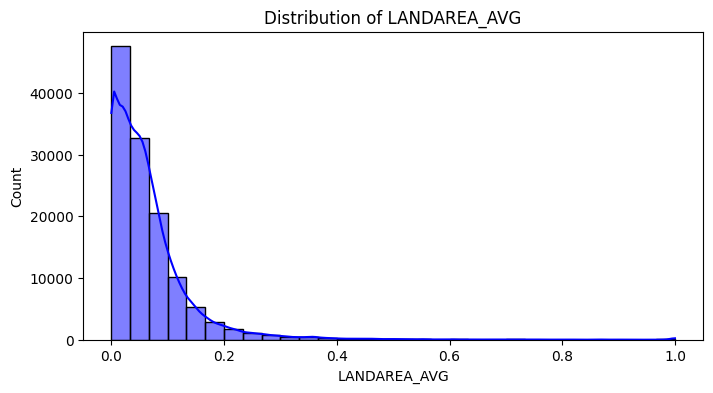

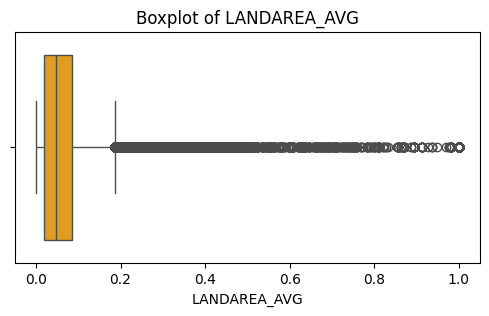

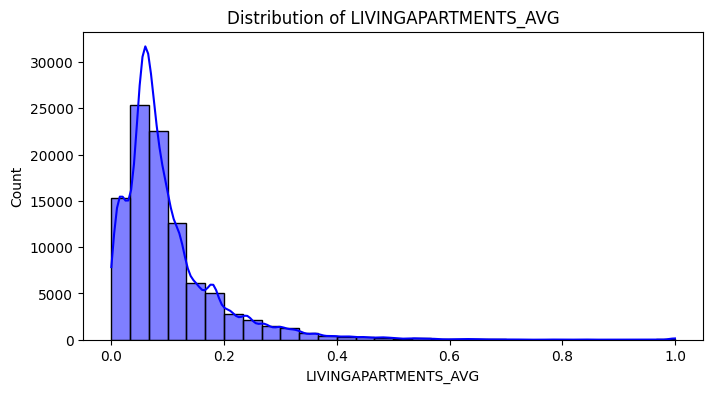

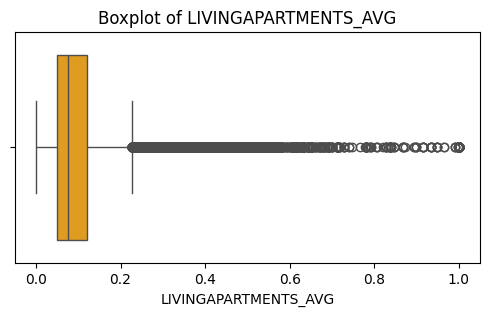

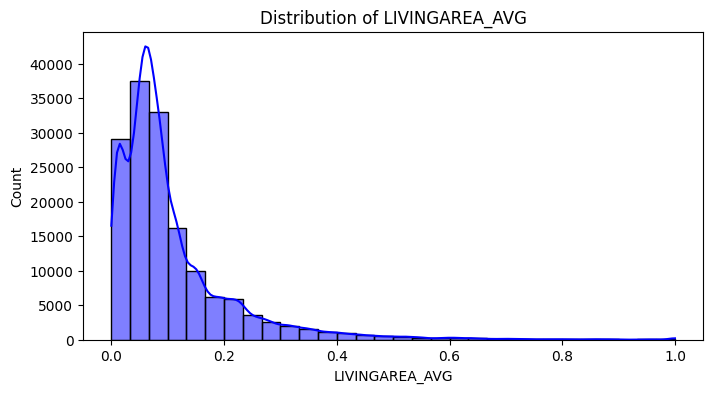

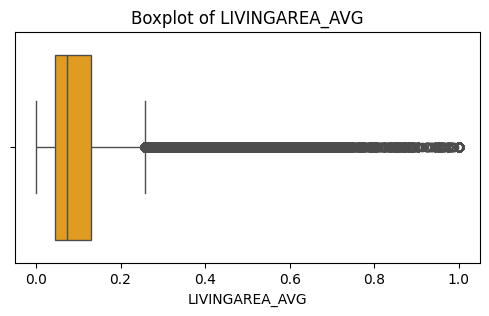

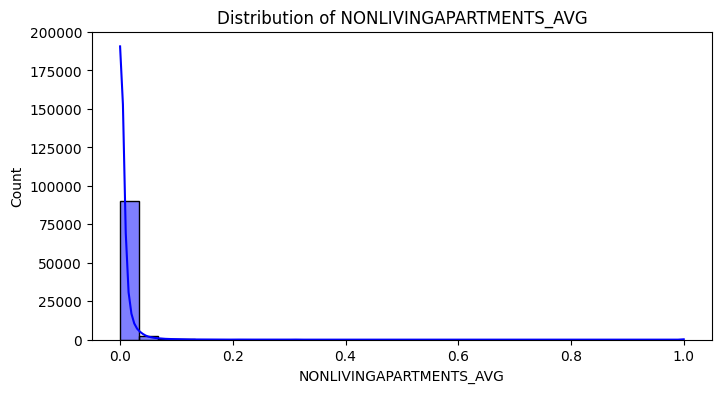

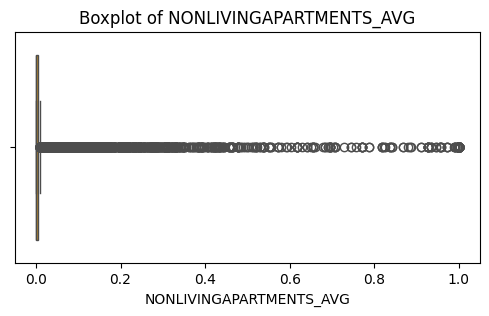

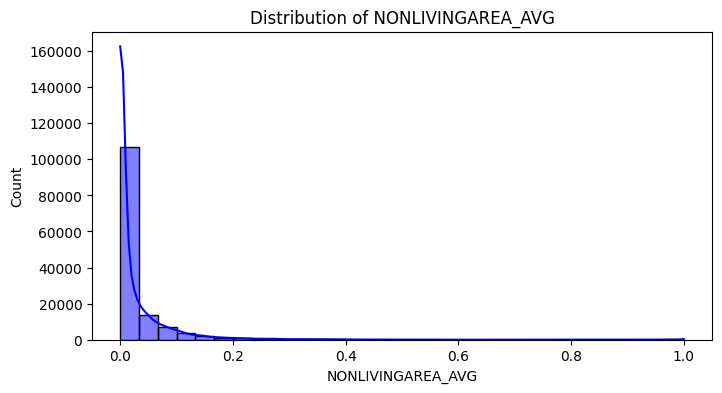

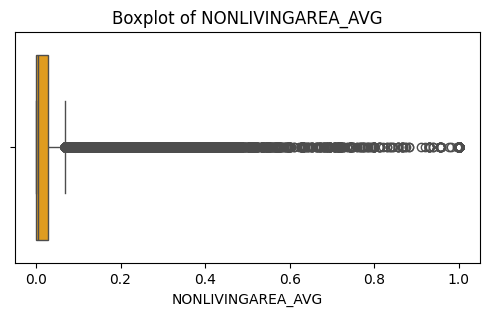

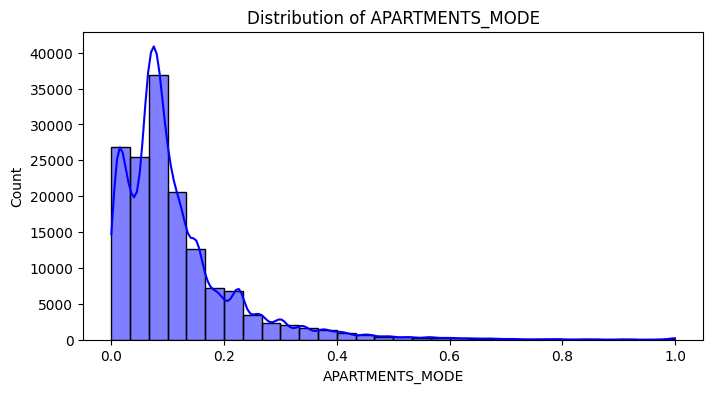

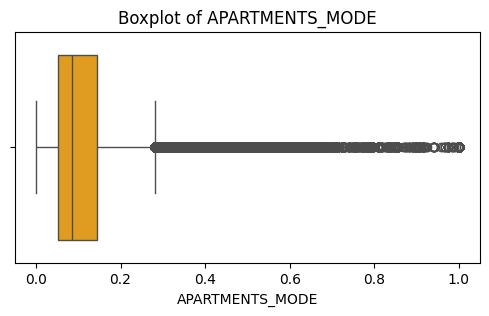

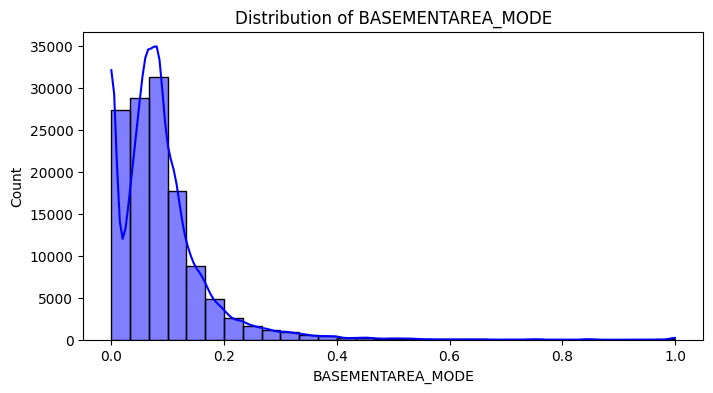

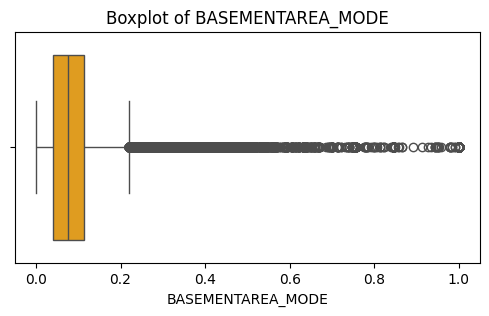

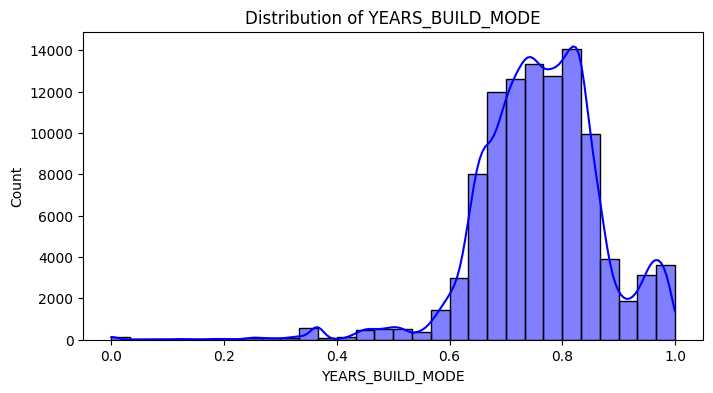

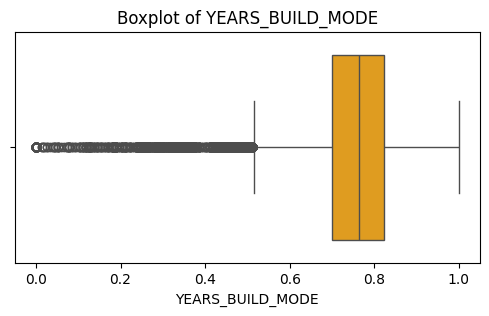

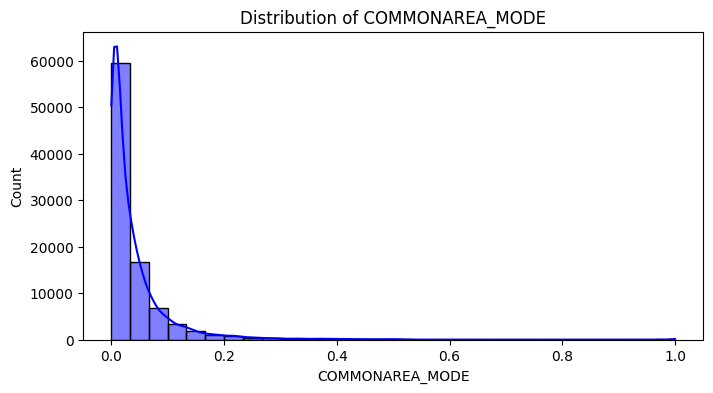

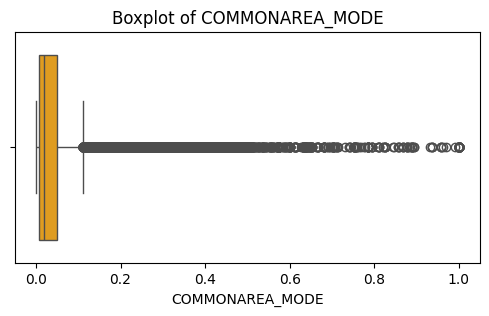

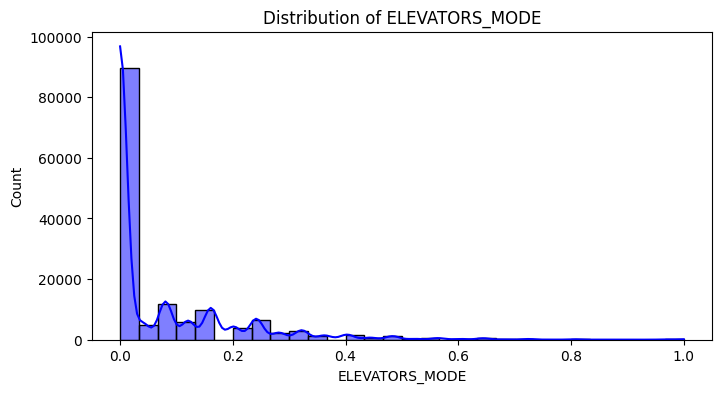

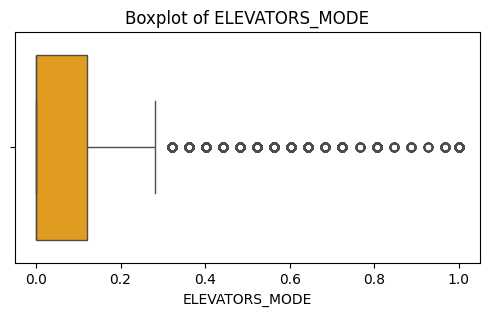

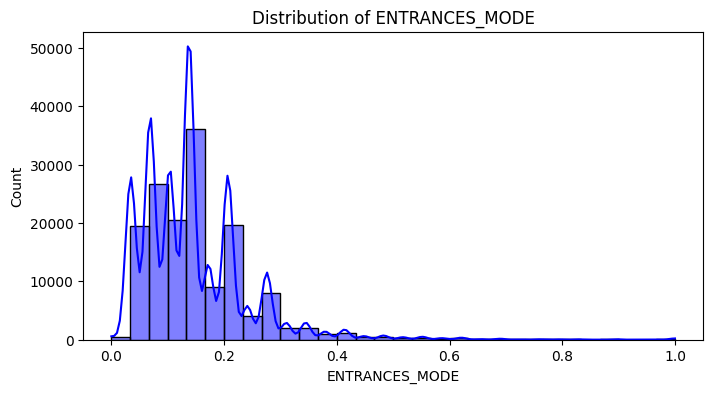

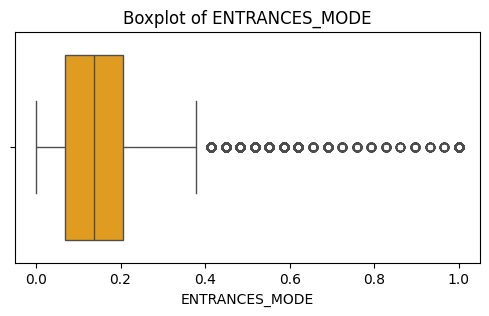

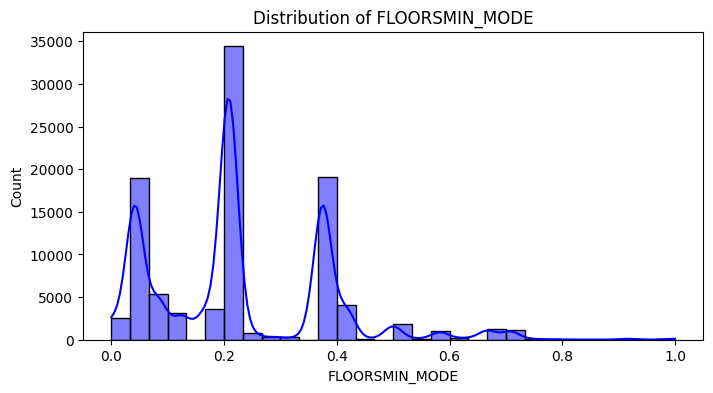

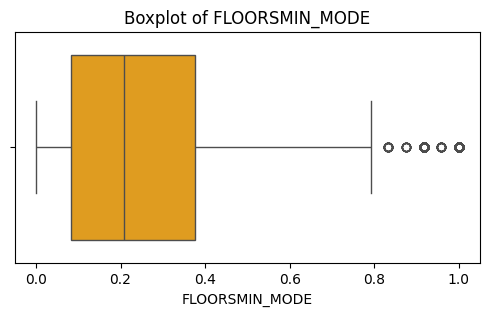

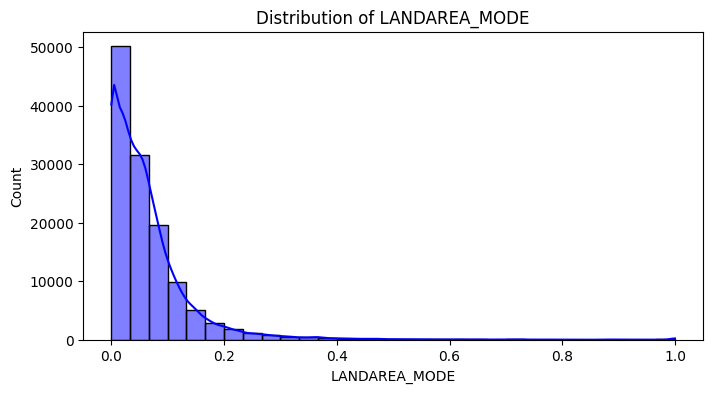

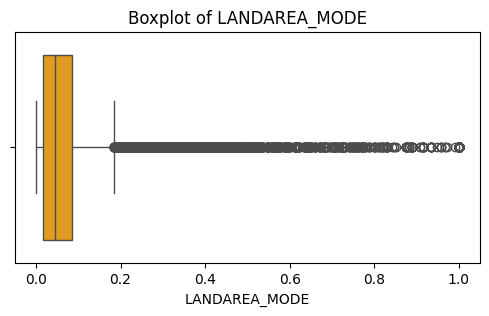

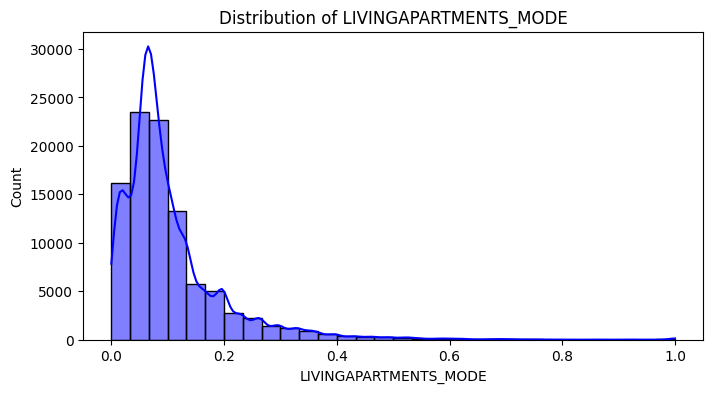

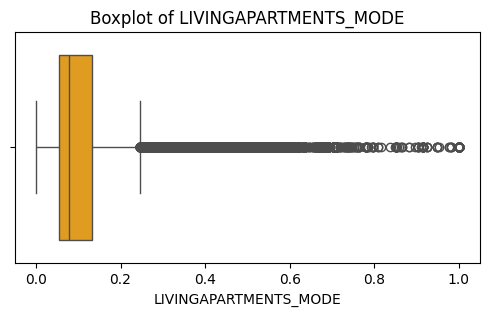

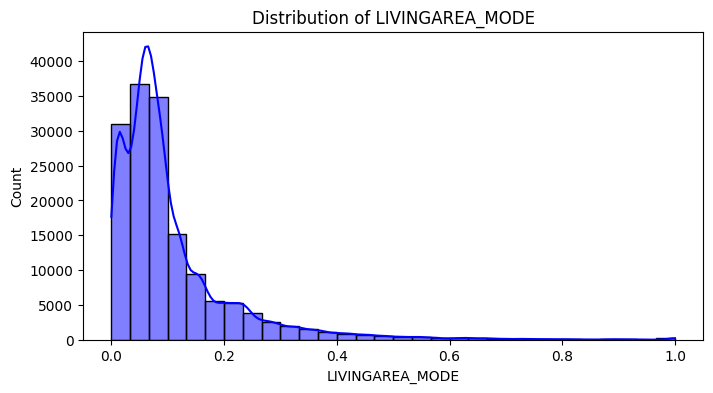

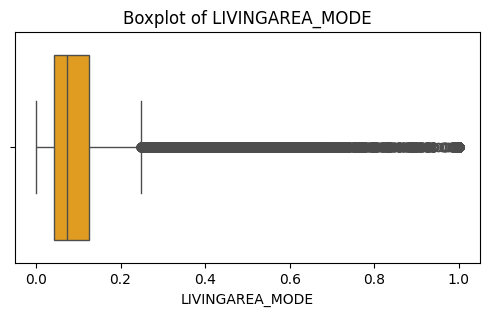

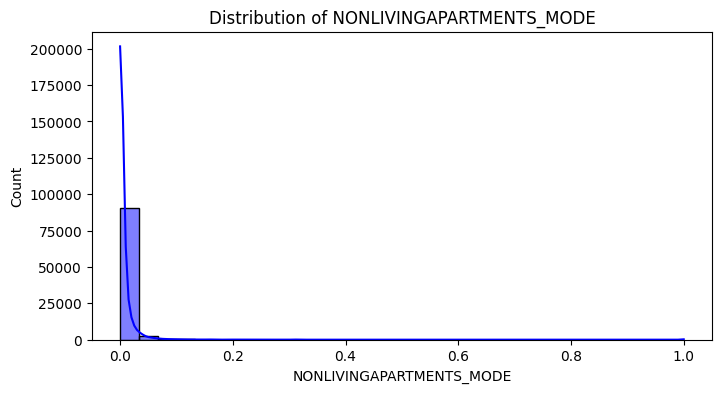

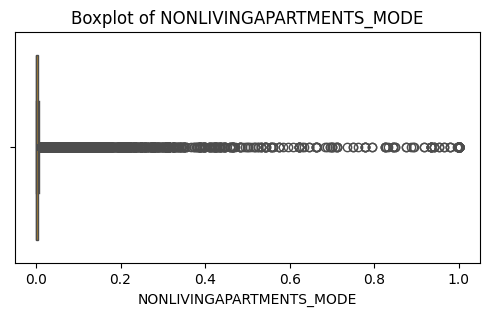

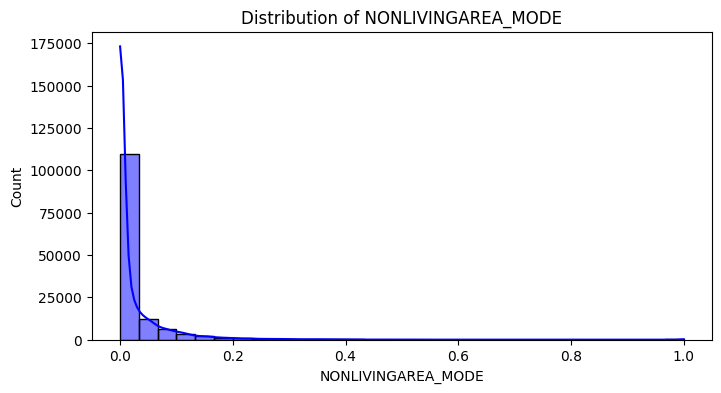

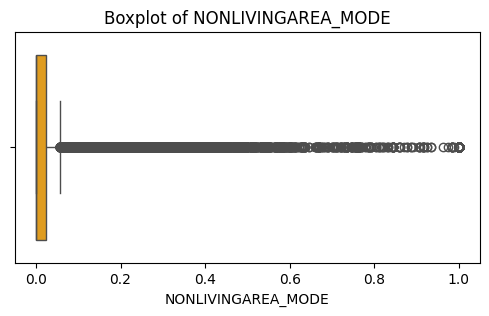

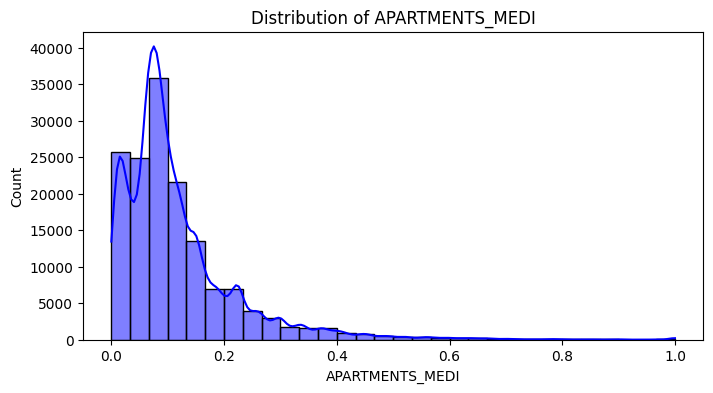

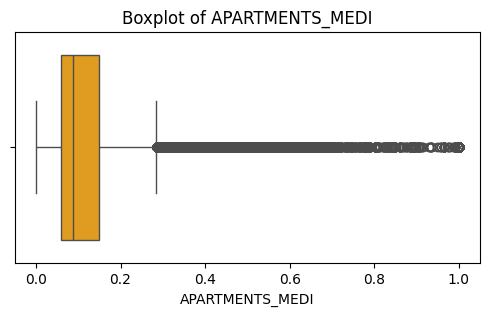

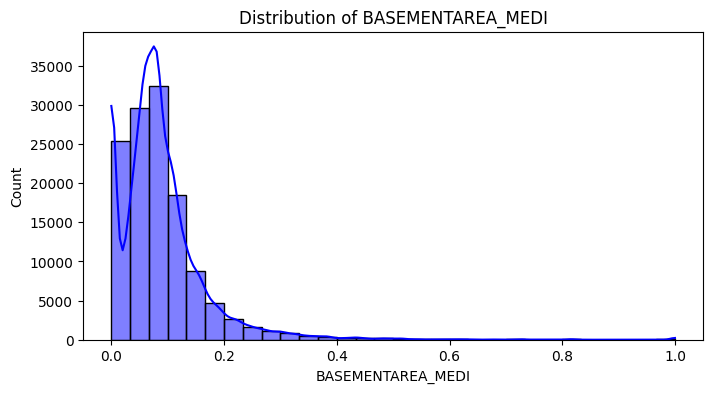

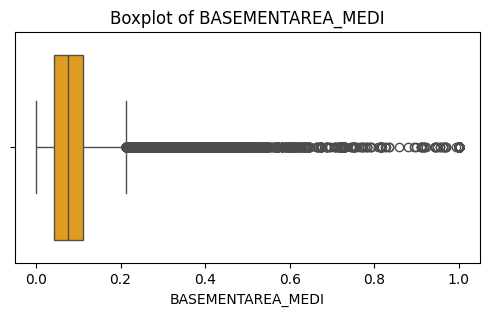

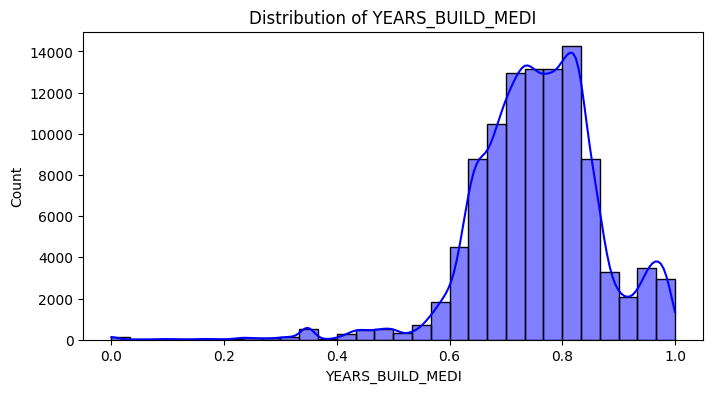

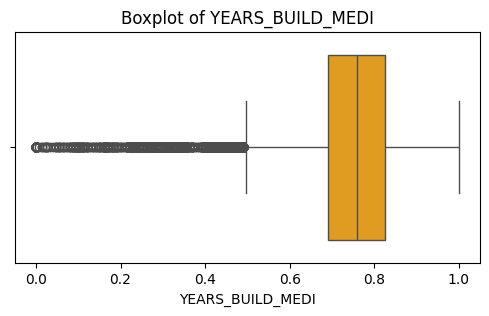

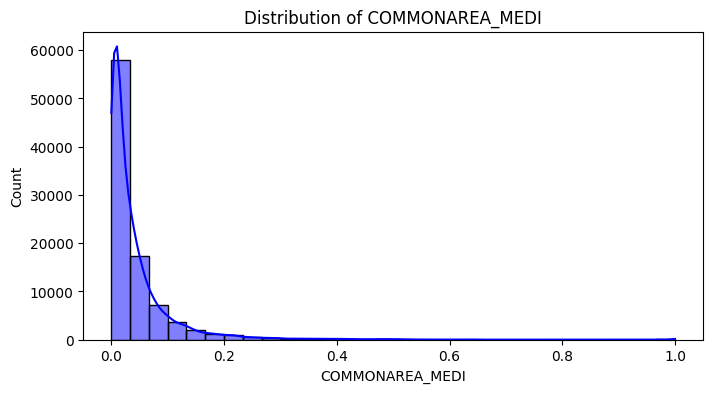

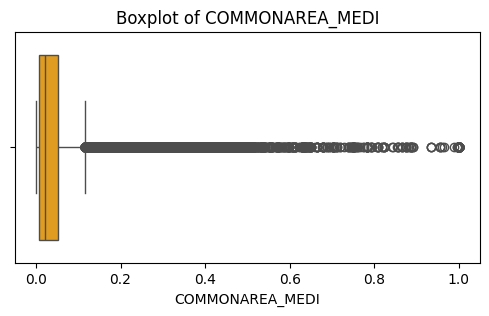

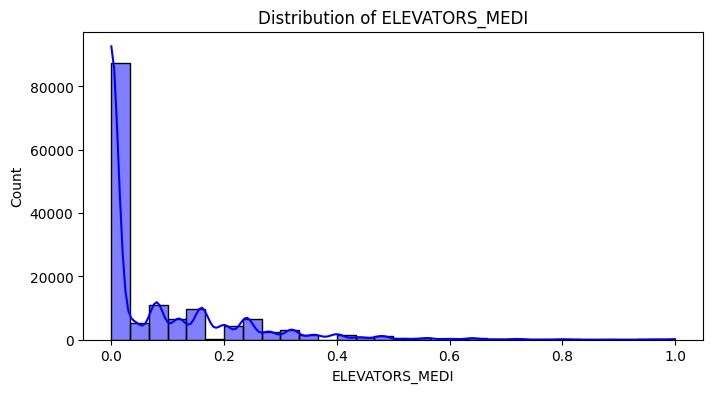

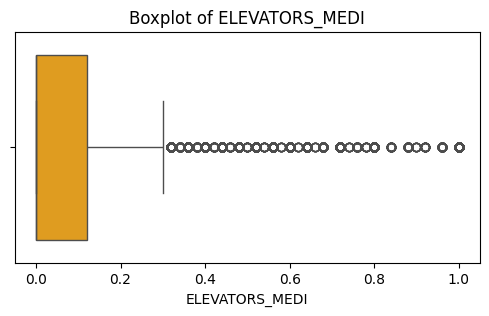

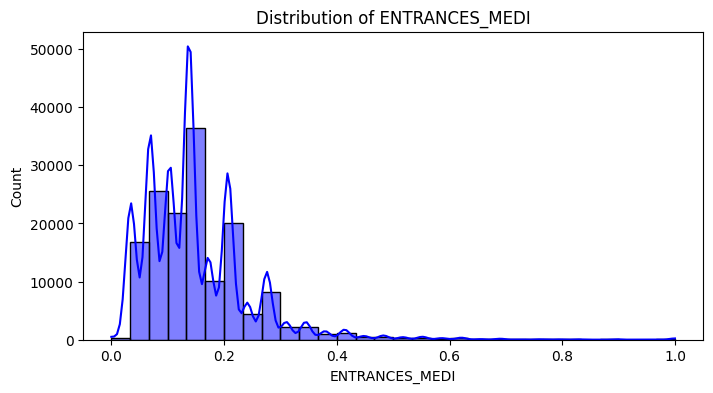

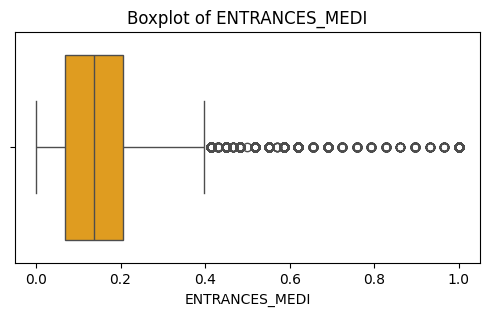

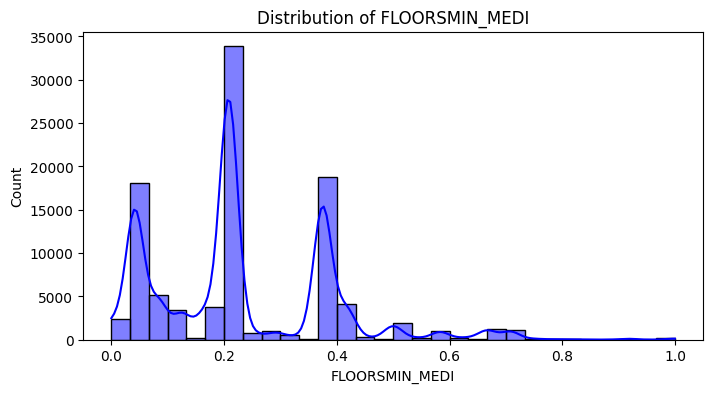

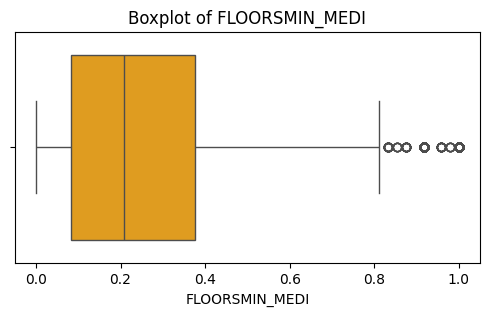

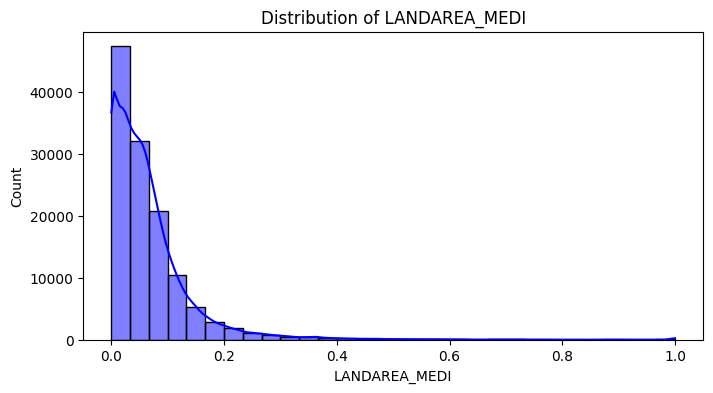

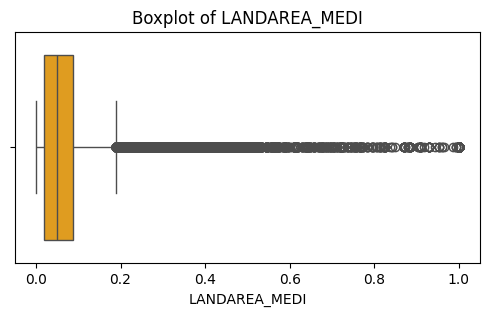

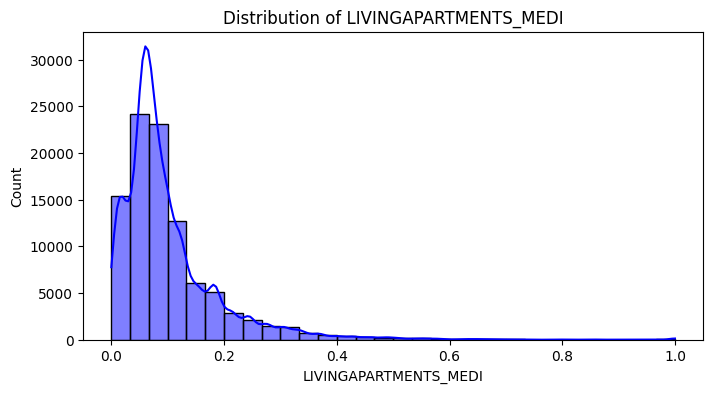

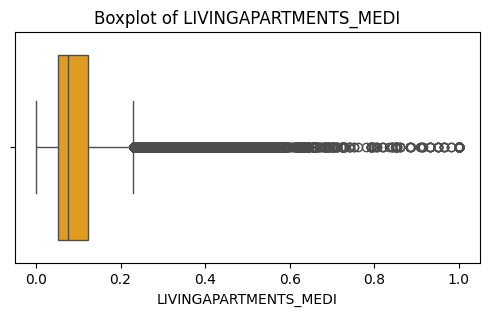

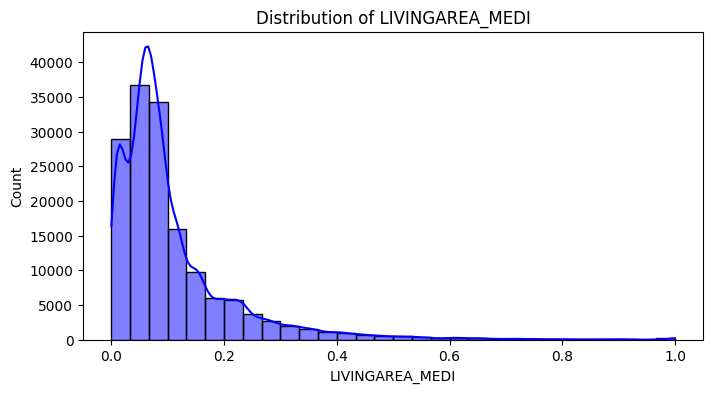

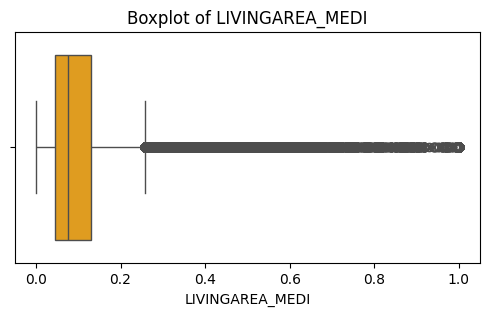

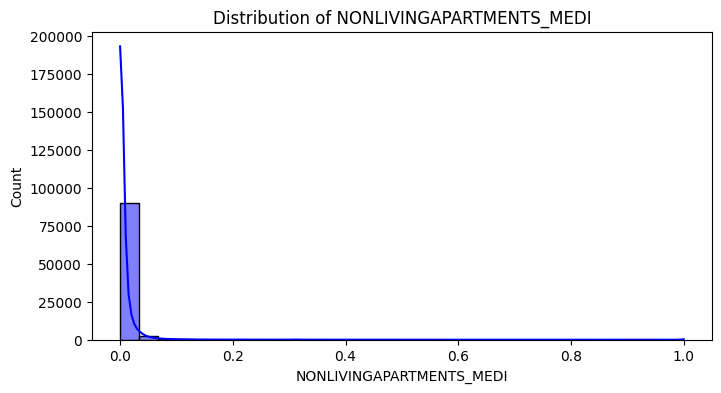

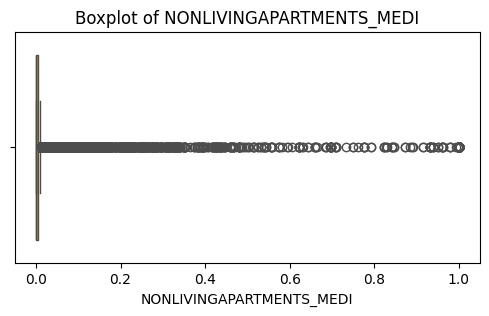

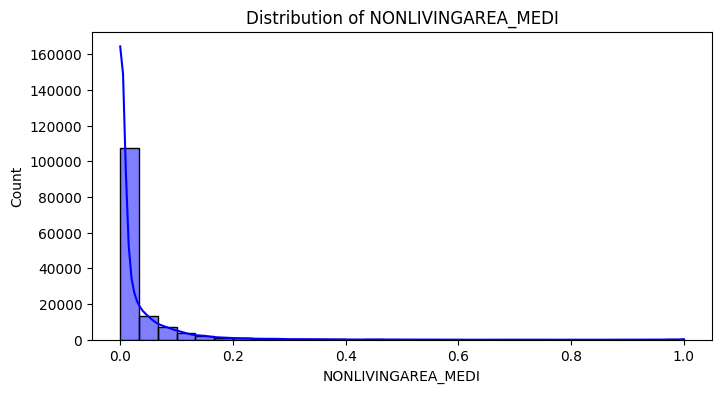

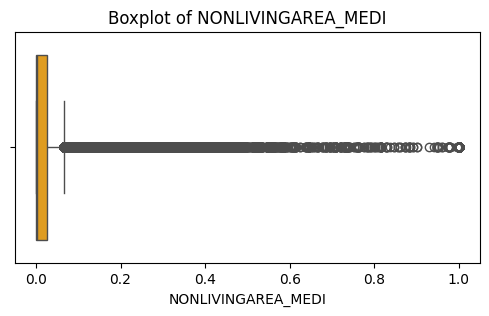

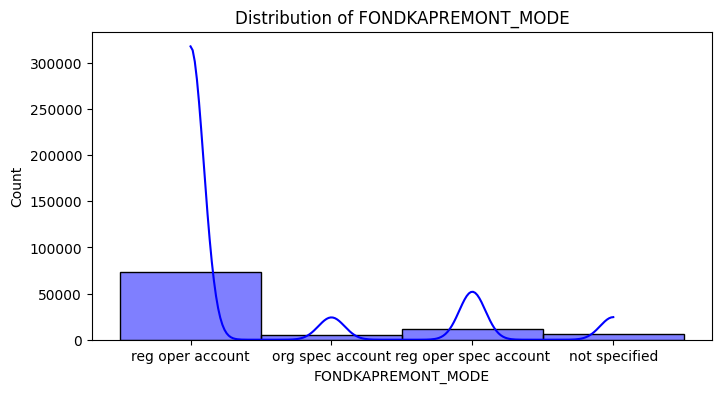

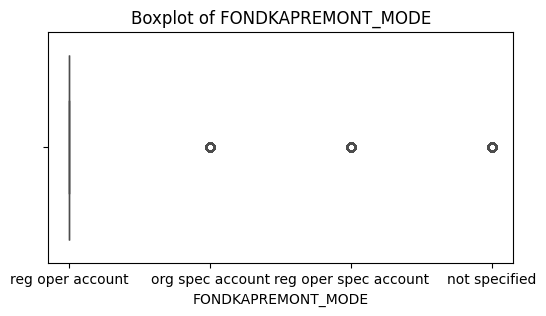

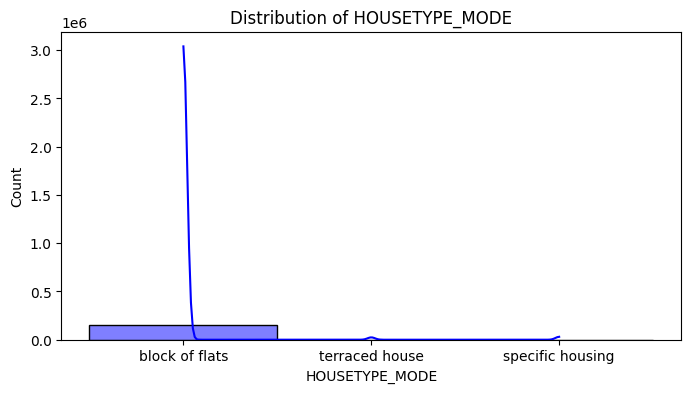

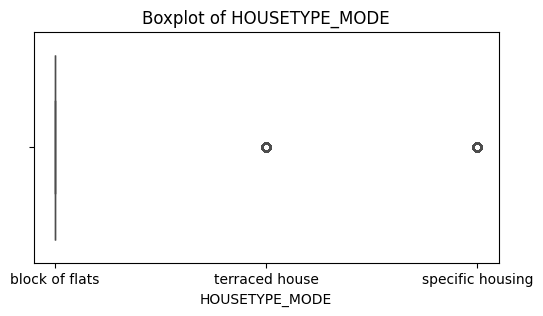

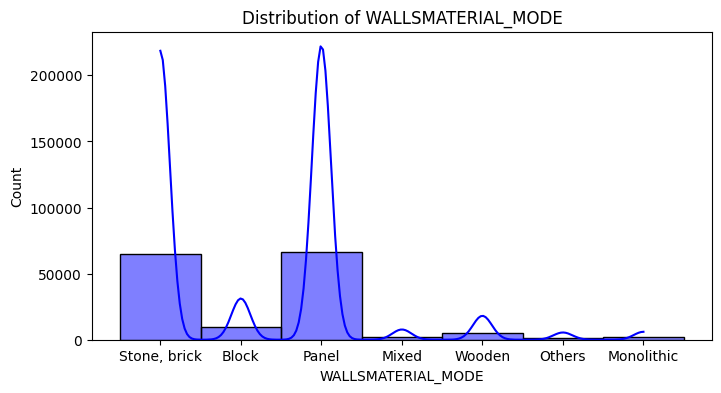

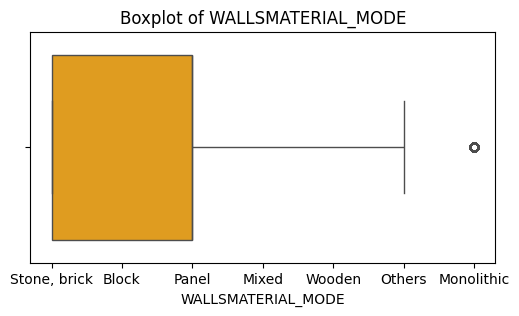

In [ ]:
# Looking the distribution of the data in filtered_values
filtered_columns = filtered_values.index.tolist()

plt.figure(figsize=(15, 10))

# Loop through each column of it and plot its distribution
for i, col in enumerate(filtered_columns):
    plt.figure(figsize=(8, 4))

    # Histogram
    sns.histplot(df_train_copy[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_train_copy[col], color="orange")
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
# Checking the correlation of TARGET with each of the column in filtered_values which its datatype not an object
target_col = "TARGET"

filtered_columns = filtered_values.index.tolist()

filtered_numerical = [col for col in filtered_columns if df_train_copy[col].dtype != 'O']

corr_with_target = df_train_copy[filtered_numerical + [target_col]].corr()[target_col].sort_values(ascending=False)
corr_with_target

TARGET                      1.000000
OWN_CAR_AGE                 0.037612
NONLIVINGAPARTMENTS_MODE   -0.001557
NONLIVINGAPARTMENTS_MEDI   -0.002757
NONLIVINGAPARTMENTS_AVG    -0.003176
LANDAREA_MODE              -0.010174
LANDAREA_AVG               -0.010885
LANDAREA_MEDI              -0.011256
NONLIVINGAREA_MODE         -0.012711
NONLIVINGAREA_MEDI         -0.013337
NONLIVINGAREA_AVG          -0.013578
COMMONAREA_MODE            -0.016340
ENTRANCES_MODE             -0.017387
COMMONAREA_AVG             -0.018550
COMMONAREA_MEDI            -0.018573
ENTRANCES_MEDI             -0.019025
ENTRANCES_AVG              -0.019172
BASEMENTAREA_MODE          -0.019952
YEARS_BUILD_MODE           -0.022068
BASEMENTAREA_MEDI          -0.022081
YEARS_BUILD_AVG            -0.022149
YEARS_BUILD_MEDI           -0.022326
BASEMENTAREA_AVG           -0.022746
LIVINGAPARTMENTS_MODE      -0.023393
LIVINGAPARTMENTS_MEDI      -0.024621
LIVINGAPARTMENTS_AVG       -0.025031
APARTMENTS_MODE            -0.027284
APARTMENTS_MEDI            -0.029184
APARTMENTS_AVG             -0.029498
LIVINGAREA_MODE            -0.030685
ELEVATORS_MODE             -0.032131
FLOORSMIN_MODE             -0.032698
LIVINGAREA_MEDI            -0.032739
LIVINGAREA_AVG             -0.032997
FLOORSMIN_MEDI             -0.033394
FLOORSMIN_AVG              -0.033614
ELEVATORS_MEDI             -0.033863
ELEVATORS_AVG              -0.034199
EXT_SOURCE_1               -0.155317
Name: TARGET, dtype: float64

In [ ]:
# Trying to impute the missing values in the filtered_numerical using median
for col in filtered_numerical:
    median_value = df_train_copy[col].median()
    df_train_copy[col].fillna(median_value, inplace=True)

In [ ]:
# Transforming the filtered_numerical using Scaling because most of the data in the column is skewed
high_std_threshold = df_train_copy[filtered_numerical].std().median()

high_std_cols = df_train_copy[filtered_numerical].std()[df_train_copy[filtered_numerical].std() > high_std_threshold].index.tolist()

for col in high_std_cols:
    if (df_train_copy[col] > 0).all():
        df_train_copy[col] = np.log1p(df_train_copy[col])

scaler = MinMaxScaler()
df_train_copy[high_std_cols] = scaler.fit_transform(df_train_copy[high_std_cols])

df_train_copy[high_std_cols].describe().T

count      mean       std  min       25%       50%  \
OWN_CAR_AGE       307511.0  0.110341  0.078189  0.0  0.098901  0.098901   
EXT_SOURCE_1      307511.0  0.590200  0.144007  0.0  0.598606  0.598606   
APARTMENTS_AVG    307511.0  0.102297  0.077412  0.0  0.087600  0.087600   
YEARS_BUILD_AVG   307511.0  0.754286  0.065580  0.0  0.755200  0.755200   
ELEVATORS_AVG     307511.0  0.036869  0.100048  0.0  0.000000  0.000000   
ENTRANCES_AVG     307511.0  0.143771  0.070746  0.0  0.137900  0.137900   
FLOORSMIN_AVG     307511.0  0.215886  0.092167  0.0  0.208300  0.208300   
LIVINGAREA_AVG    307511.0  0.090886  0.079745  0.0  0.074500  0.074500   
APARTMENTS_MODE   307511.0  0.098889  0.077241  0.0  0.084000  0.084000   
ELEVATORS_MODE    307511.0  0.034790  0.097726  0.0  0.000000  0.000000   
ENTRANCES_MODE    307511.0  0.141521  0.071245  0.0  0.137900  0.137900   
FLOORSMIN_MODE    307511.0  0.214653  0.091846  0.0  0.208300  0.208300   
LIVINGAREA_MODE   307511.0  0.089474  0.080627  0.0  0.073100  0.073100   
APARTMENTS_MEDI   307511.0  0.101889  0.078146  0.0  0.086400  0.086400   
YEARS_BUILD_MEDI  307511.0  0.757577  0.064878  0.0  0.758500  0.758500   
ELEVATORS_MEDI    307511.0  0.036465  0.099810  0.0  0.000000  0.000000   
ENTRANCES_MEDI    307511.0  0.143517  0.070949  0.0  0.137900  0.137900   
FLOORSMIN_MEDI    307511.0  0.215799  0.092464  0.0  0.208300  0.208300   
LIVINGAREA_MEDI   307511.0  0.091688  0.080999  0.0  0.074900  0.074900   

                       75%  max  
OWN_CAR_AGE       0.098901  1.0  
EXT_SOURCE_1      0.598606  1.0  
APARTMENTS_AVG    0.087600  1.0  
YEARS_BUILD_AVG   0.755200  1.0  
ELEVATORS_AVG     0.000000  1.0  
ENTRANCES_AVG     0.137900  1.0  
FLOORSMIN_AVG     0.208300  1.0  
LIVINGAREA_AVG    0.074500  1.0  
APARTMENTS_MODE   0.084000  1.0  
ELEVATORS_MODE    0.000000  1.0  
ENTRANCES_MODE    0.137900  1.0  
FLOORSMIN_MODE    0.208300  1.0  
LIVINGAREA_MODE   0.073100  1.0  
APARTMENTS_MEDI   0.086400  1.0  
YEARS_BUILD_MEDI  0.758500  1.0  
ELEVATORS_MEDI    0.000000  1.0  
ENTRANCES_MEDI    0.137900  1.0  
FLOORSMIN_MEDI    0.208300  1.0  
LIVINGAREA_MEDI   0.074900  1.0

In [ ]:
# Checking again the correlation of TARGET with each of the column which have been transformed before
target_col = "TARGET"

corr_with_target = df_train_copy[high_std_cols + [target_col]].corr()[target_col].sort_values(ascending=False)
corr_with_target

TARGET              1.000000
OWN_CAR_AGE         0.015982
YEARS_BUILD_AVG    -0.011281
YEARS_BUILD_MEDI   -0.011364
ENTRANCES_MODE     -0.013515
ENTRANCES_MEDI     -0.015734
ENTRANCES_AVG      -0.015984
FLOORSMIN_MODE     -0.020147
FLOORSMIN_MEDI     -0.020995
FLOORSMIN_AVG      -0.021158
APARTMENTS_MODE    -0.025418
APARTMENTS_AVG     -0.026734
APARTMENTS_MEDI    -0.026841
LIVINGAREA_MODE    -0.027884
LIVINGAREA_MEDI    -0.029359
LIVINGAREA_AVG     -0.029464
ELEVATORS_MODE     -0.034220
ELEVATORS_MEDI     -0.035552
ELEVATORS_AVG      -0.035853
EXT_SOURCE_1       -0.100240
Name: TARGET, dtype: float64

In [ ]:
# Check each of the column contain in filtered_values which its datatype is an object
filtered_categorical = df_train_copy.select_dtypes(include=['object']).columns
filtered_categorical = [col for col in filtered_categorical if col in filtered_values]
print(filtered_categorical)

df_train_copy[filtered_categorical].isnull().sum()

['FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


FONDKAPREMONT_MODE    210295
HOUSETYPE_MODE        154297
WALLSMATERIAL_MODE    156341
dtype: int64

In [ ]:
# Trying to impute the missing values in the filtered_categorical using mode
for col in filtered_categorical:
    mode_value = df_train_copy[col].mode()[0]
    df_train_copy[col].fillna(mode_value, inplace=True)

In [ ]:
df_train_copy[filtered_categorical].nunique()

FONDKAPREMONT_MODE    4
HOUSETYPE_MODE        3
WALLSMATERIAL_MODE    7
dtype: int64

In [ ]:
# Doing One-Hot Encoding for the categorical column if its unique values more than 2
df_train_copy = pd.get_dummies(df_train_copy, columns=[col for col in filtered_categorical if df_train_copy[col].nunique() > 2], drop_first=True)

In [ ]:
# Making new dictionary for mapping old name of the column into the new one to adjust with the result of the OHE before
rename_dict = {}

for col in filtered_categorical:
    ohe_cols = [c for c in df_train_copy.columns if c.startswith(col + "_")]

    for ohe_col in ohe_cols:
        rename_dict[ohe_col] = ohe_col

df_train_copy.rename(columns=rename_dict, inplace=True)
"Kolom setelah perubahan nama:", list(df_train_copy.columns)

('Kolom setelah perubahan nama:',
 ['OWN_CAR_AGE',
  'SK_ID_CURR',
  'TARGET',
  'NAME_CONTRACT_TYPE',
  'CODE_GENDER',
  'FLAG_OWN_CAR',
  'FLAG_OWN_REALTY',
  'CNT_CHILDREN',
  'AMT_INCOME_TOTAL',
  'AMT_CREDIT',
  'AMT_ANNUITY',
  'AMT_GOODS_PRICE',
  'NAME_TYPE_SUITE',
  'NAME_INCOME_TYPE',
  'NAME_EDUCATION_TYPE',
  'NAME_FAMILY_STATUS',
  'NAME_HOUSING_TYPE',
  'REGION_POPULATION_RELATIVE',
  'DAYS_BIRTH',
  'DAYS_EMPLOYED',
  'DAYS_REGISTRATION',
  'DAYS_ID_PUBLISH',
  'FLAG_MOBIL',
  'FLAG_EMP_PHONE',
  'FLAG_WORK_PHONE',
  'FLAG_CONT_MOBILE',
  'FLAG_PHONE',
  'FLAG_EMAIL',
  'OCCUPATION_TYPE',
  'CNT_FAM_MEMBERS',
  'REGION_RATING_CLIENT',
  'REGION_RATING_CLIENT_W_CITY',
  'WEEKDAY_APPR_PROCESS_START',
  'HOUR_APPR_PROCESS_START',
  'REG_REGION_NOT_LIVE_REGION',
  'REG_REGION_NOT_WORK_REGION',
  'LIVE_REGION_NOT_WORK_REGION',
  'REG_CITY_NOT_LIVE_CITY',
  'REG_CITY_NOT_WORK_CITY',
  'LIVE_CITY_NOT_WORK_CITY',
  'ORGANIZATION_TYPE',
  'EXT_SOURCE_1',
  'EXT_SOURCE_2',
  'EXT_

In [ ]:
# Checking again the correlation of TARGET with each of the column which have been transformed its name before
target_col = "TARGET"

ohe_columns = [col for col in df_train_copy.columns if any(col.startswith(cat + "_") for cat in filtered_categorical)]

corr_cat_with_target = df_train_copy[ohe_columns + [target_col]].corr()[target_col].sort_values(ascending=False)
print("Korelasi antara fitur hasil OHE dengan TARGET:")
corr_cat_with_target

Korelasi antara fitur hasil OHE dengan TARGET:


TARGET                                      1.000000
FONDKAPREMONT_MODE_reg oper account         0.015308
WALLSMATERIAL_MODE_Panel                    0.013618
WALLSMATERIAL_MODE_Wooden                   0.007946
HOUSETYPE_MODE_specific housing             0.005311
HOUSETYPE_MODE_terraced house               0.000982
WALLSMATERIAL_MODE_Others                   0.000628
WALLSMATERIAL_MODE_Mixed                   -0.001713
WALLSMATERIAL_MODE_Monolithic              -0.009384
FONDKAPREMONT_MODE_reg oper spec account   -0.011257
FONDKAPREMONT_MODE_org spec account        -0.011285
WALLSMATERIAL_MODE_Stone, brick            -0.012657
Name: TARGET, dtype: float64

Because all of the numerical and categorical column(with more than 50% missing values) which i've been handled and transformed before, not having a good correlation with the TARGET, so i decided to drop all of it.

In [ ]:
# Create a function for dropping column
def drop_columns(df):
    missing_value_perc = (df_train.isnull().sum() / df_train.shape[0]) * 100
    filtering_drop = missing_value_perc[missing_value_perc > 50].index
    df = df.drop(columns = filtering_drop)
    return df

In [ ]:
# Drop the column
df_train = drop_columns(df_train)
df_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 81 columns]

In [ ]:
df_train.duplicated().sum()

np.int64(0)

Next, i want to handle all of the column with missing values percentage around 0 until 50% both for the numerical and categorical, respectively.

In [ ]:
missing_value_perc = (df_train.isnull().sum()/df_train.shape[0]) * 100
missing_value_perc

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 81, dtype: float64

In [ ]:
# Filter the column with missing value percentage between 0 and 50%
filtering = (missing_value_perc > 0.0) & (missing_value_perc < 50.0)
filtered_values = filtering[filtering].index.tolist()

missing_perc = missing_value_perc[filtered_values].sort_values(ascending=False)

for col in missing_perc.index:
    print(f"{col} | {df_train[col].dtype} | {missing_perc[col]}")

FLOORSMAX_AVG | float64 | 49.76082156410665
FLOORSMAX_MODE | float64 | 49.76082156410665
FLOORSMAX_MEDI | float64 | 49.76082156410665
YEARS_BEGINEXPLUATATION_MEDI | float64 | 48.781019215572776
YEARS_BEGINEXPLUATATION_MODE | float64 | 48.781019215572776
YEARS_BEGINEXPLUATATION_AVG | float64 | 48.781019215572776
TOTALAREA_MODE | float64 | 48.26851722377411
EMERGENCYSTATE_MODE | object | 47.39830445089769
OCCUPATION_TYPE | object | 31.345545362604916
EXT_SOURCE_3 | float64 | 19.825307062186393
AMT_REQ_CREDIT_BUREAU_QRT | float64 | 13.501630835970097
AMT_REQ_CREDIT_BUREAU_YEAR | float64 | 13.501630835970097
AMT_REQ_CREDIT_BUREAU_WEEK | float64 | 13.501630835970097
AMT_REQ_CREDIT_BUREAU_DAY | float64 | 13.501630835970097
AMT_REQ_CREDIT_BUREAU_HOUR | float64 | 13.501630835970097
AMT_REQ_CREDIT_BUREAU_MON | float64 | 13.501630835970097
NAME_TYPE_SUITE | object | 0.42014757195677555
OBS_30_CNT_SOCIAL_CIRCLE | float64 | 0.3320206431639844
OBS_60_CNT_SOCIAL_CIRCLE | float64 | 0.3320206431639844

In [ ]:
# Checking the correlation of TARGET with each of the column in filtered_values which its datatype only numerical
target_col = "TARGET"

filtered_numerical = [col for col in filtered_values if df_train[col].dtype != 'O']

corr_with_target = df_train[filtered_numerical + [target_col]].corr()[target_col].sort_values(ascending=False)
corr_with_target

TARGET                          1.000000
DAYS_LAST_PHONE_CHANGE          0.055218
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
AMT_REQ_CREDIT_BUREAU_DAY       0.002704
AMT_REQ_CREDIT_BUREAU_HOUR      0.000930
AMT_REQ_CREDIT_BUREAU_WEEK      0.000788
AMT_REQ_CREDIT_BUREAU_QRT      -0.002022
YEARS_BEGINEXPLUATATION_MODE   -0.009036
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BEGINEXPLUATATION_MEDI   -0.009993
AMT_REQ_CREDIT_BUREAU_MON      -0.012462
AMT_ANNUITY                    -0.012817
TOTALAREA_MODE                 -0.032596
AMT_GOODS_PRICE                -0.039645
FLOORSMAX_MODE                 -0.043226
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_AVG                  -0.044003
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_3                   -0.178919
Name: TARGET, dtype: float64

In [ ]:
# Trying to impute the missing values in the filtered_numerical using median
for col in filtered_numerical:
    median_value = df_train[col].median()
    df_train[col].fillna(median_value, inplace=True)

In [ ]:
df_train[col].isnull().sum()

np.int64(0)

In [ ]:
# Check the correlation again
corr_with_target

TARGET                          1.000000
DAYS_LAST_PHONE_CHANGE          0.055218
DEF_30_CNT_SOCIAL_CIRCLE        0.032248
DEF_60_CNT_SOCIAL_CIRCLE        0.031276
AMT_REQ_CREDIT_BUREAU_YEAR      0.019930
CNT_FAM_MEMBERS                 0.009308
OBS_30_CNT_SOCIAL_CIRCLE        0.009131
OBS_60_CNT_SOCIAL_CIRCLE        0.009022
AMT_REQ_CREDIT_BUREAU_DAY       0.002704
AMT_REQ_CREDIT_BUREAU_HOUR      0.000930
AMT_REQ_CREDIT_BUREAU_WEEK      0.000788
AMT_REQ_CREDIT_BUREAU_QRT      -0.002022
YEARS_BEGINEXPLUATATION_MODE   -0.009036
YEARS_BEGINEXPLUATATION_AVG    -0.009728
YEARS_BEGINEXPLUATATION_MEDI   -0.009993
AMT_REQ_CREDIT_BUREAU_MON      -0.012462
AMT_ANNUITY                    -0.012817
TOTALAREA_MODE                 -0.032596
AMT_GOODS_PRICE                -0.039645
FLOORSMAX_MODE                 -0.043226
FLOORSMAX_MEDI                 -0.043768
FLOORSMAX_AVG                  -0.044003
EXT_SOURCE_2                   -0.160472
EXT_SOURCE_3                   -0.178919
Name: TARGET, dtype: float64

<Figure size 1500x1000 with 0 Axes>

<Figure size 800x400 with 0 Axes>

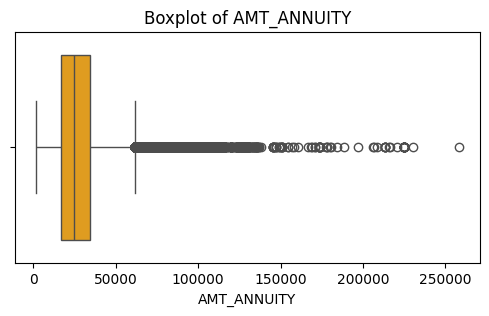

<Figure size 800x400 with 0 Axes>

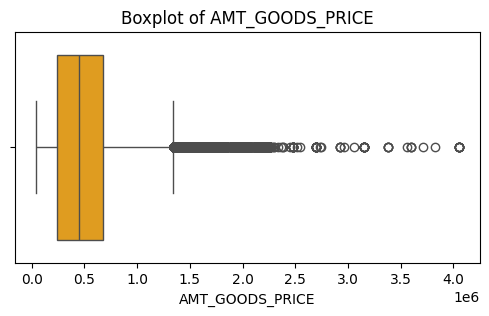

<Figure size 800x400 with 0 Axes>

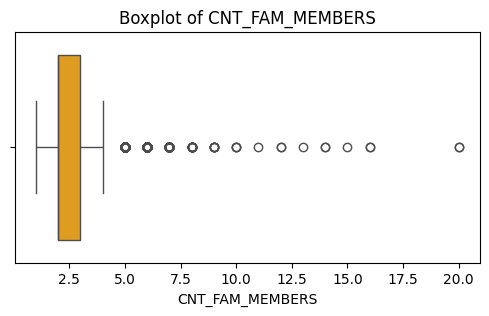

<Figure size 800x400 with 0 Axes>

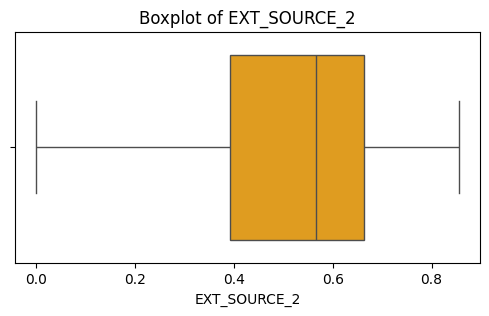

<Figure size 800x400 with 0 Axes>

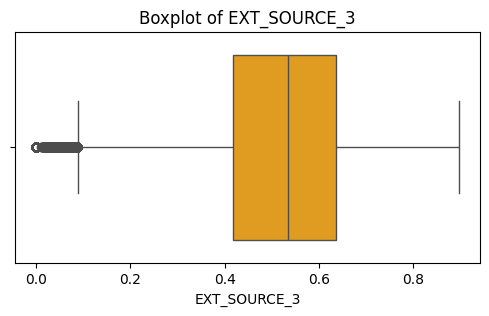

<Figure size 800x400 with 0 Axes>

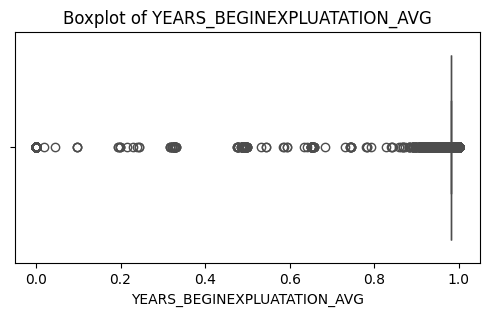

<Figure size 800x400 with 0 Axes>

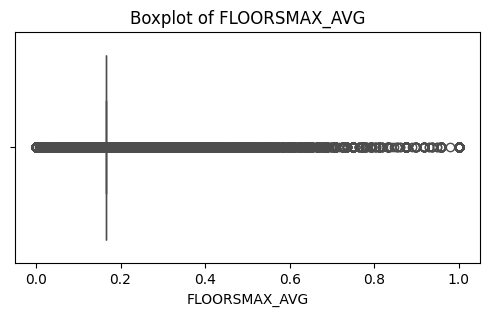

<Figure size 800x400 with 0 Axes>

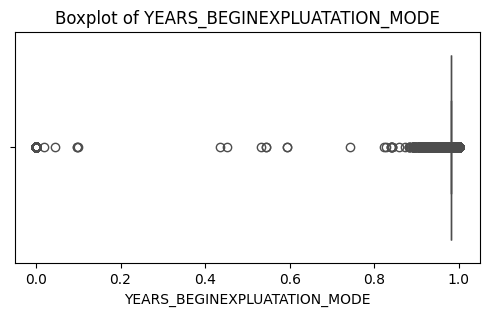

<Figure size 800x400 with 0 Axes>

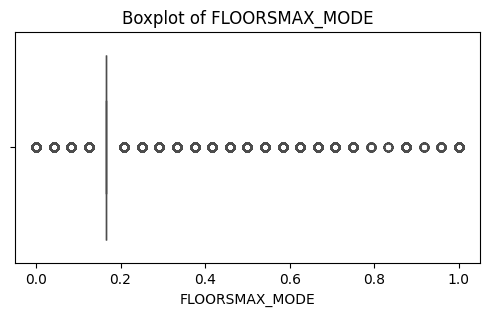

<Figure size 800x400 with 0 Axes>

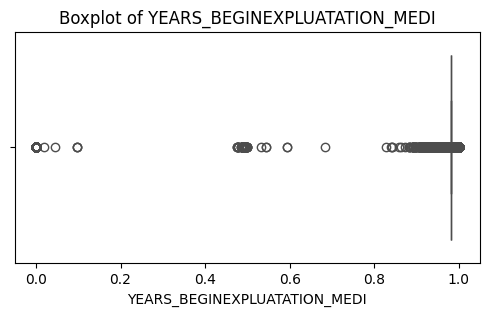

<Figure size 800x400 with 0 Axes>

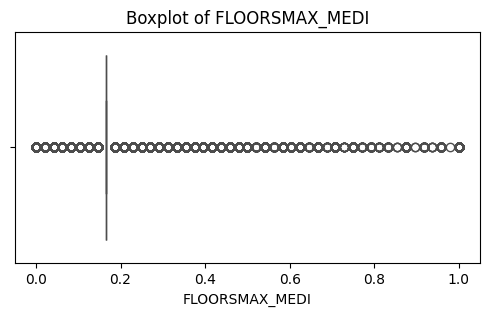

<Figure size 800x400 with 0 Axes>

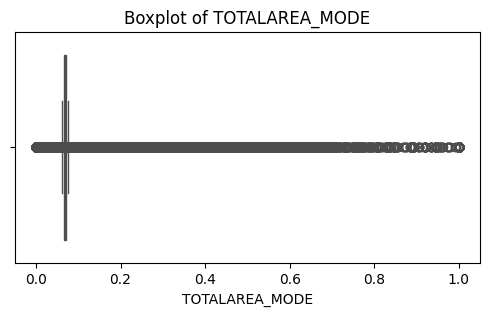

<Figure size 800x400 with 0 Axes>

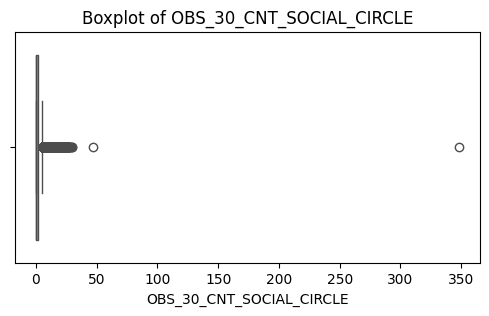

<Figure size 800x400 with 0 Axes>

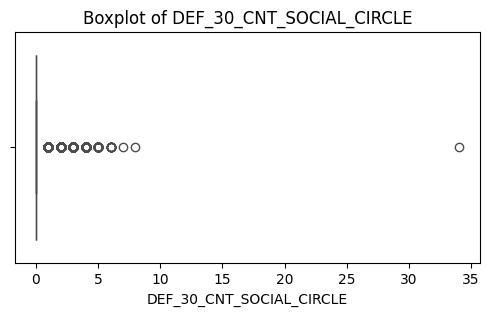

<Figure size 800x400 with 0 Axes>

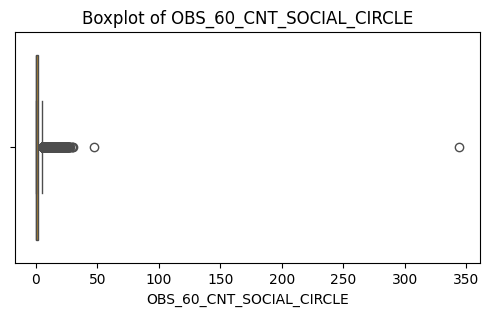

<Figure size 800x400 with 0 Axes>

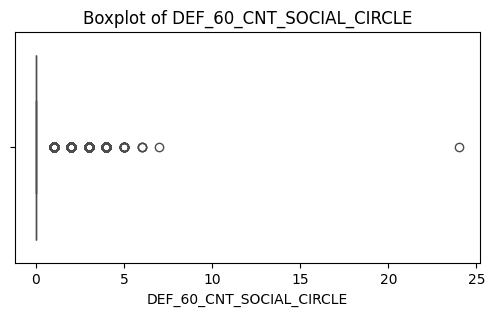

<Figure size 800x400 with 0 Axes>

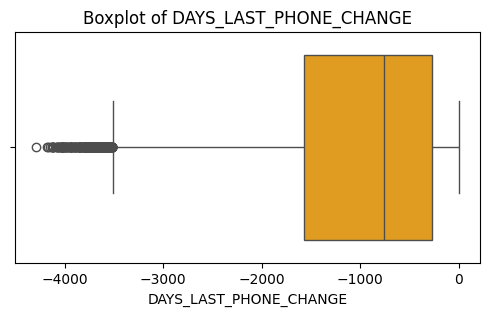

<Figure size 800x400 with 0 Axes>

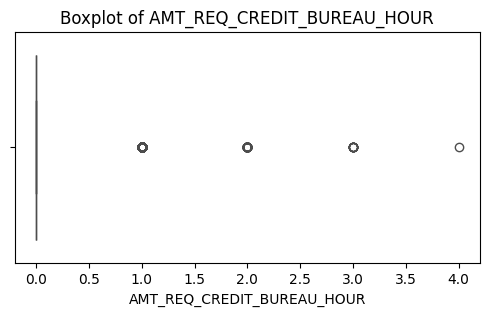

<Figure size 800x400 with 0 Axes>

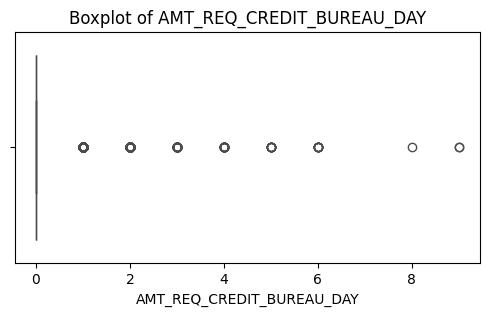

<Figure size 800x400 with 0 Axes>

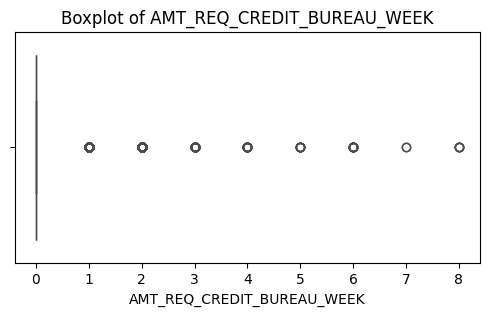

<Figure size 800x400 with 0 Axes>

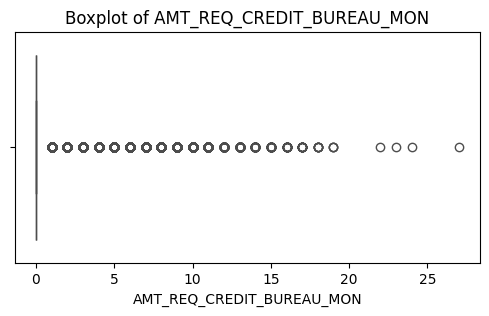

<Figure size 800x400 with 0 Axes>

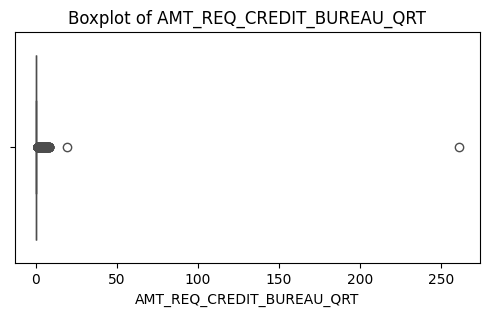

<Figure size 800x400 with 0 Axes>

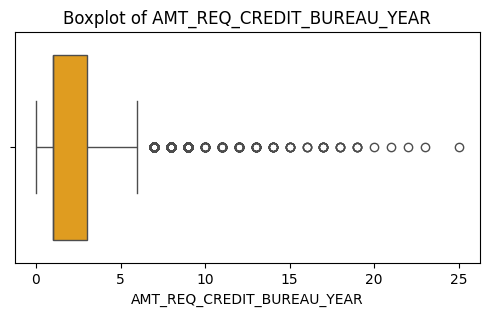

In [ ]:
# Looking the distribution of the data in filtered_numerical
plt.figure(figsize=(15, 10))

for i, col in enumerate(filtered_numerical):
    plt.figure(figsize=(8, 4))

    # Boxplot
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df_train[col], color="orange")
    plt.title(f"Boxplot of {col}")
    plt.show()

Decided to drop some columns: 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI'. The reason for why i drop them is because they have low value of correlation with the 'TARGET'(less than 0.01) and have large number of outliers which may make the result noisy.

In [ ]:
# Drop the selected columns
columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI']
df_train = df_train.drop(columns=columns)

In [ ]:
missing_value_perc = (df_train.isnull().sum()/df_train.shape[0]) * 100
missing_value_perc

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
FLAG_DOCUMENT_19              0.0
FLAG_DOCUMENT_20              0.0
FLAG_DOCUMENT_21              0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 72, dtype: float64

In [ ]:
# Filter the remaining column which is the categorical column
filtering = (missing_value_perc > 0.0) & (missing_value_perc < 50.0)
filtered_values = filtering[filtering].index.tolist()

missing_perc = missing_value_perc[filtered_values].sort_values(ascending=False)

for col in missing_perc.index:
    print(f"{col} | {df_train[col].dtype} | {missing_perc[col]}")

EMERGENCYSTATE_MODE | object | 47.39830445089769
OCCUPATION_TYPE | object | 31.345545362604916
NAME_TYPE_SUITE | object | 0.42014757195677555


In [ ]:
filtered_categorical = df_train.select_dtypes(include=['object']).columns
filtered_categorical = [col for col in filtered_categorical if col in filtered_values]
filtered_categorical

['NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE']

In [ ]:
# Checking the total null values in categorical column
print(df_train[filtered_categorical].isnull().sum())
print(df_train[filtered_categorical].nunique())

NAME_TYPE_SUITE          1292
OCCUPATION_TYPE         96391
EMERGENCYSTATE_MODE    145755
dtype: int64
NAME_TYPE_SUITE         7
OCCUPATION_TYPE        18
EMERGENCYSTATE_MODE     2
dtype: int64


In [ ]:
# Trying to impute the missing values in the filtered_categorical using mode
for col in filtered_categorical:
    mode_value = df_train[col].mode()[0]
    df_train[col].fillna(mode_value, inplace=True)

In [ ]:
missing_value_perc = (df_train.isnull().sum()/df_train.shape[0]) * 100
missing_value_perc

SK_ID_CURR                    0.0
TARGET                        0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
                             ... 
FLAG_DOCUMENT_19              0.0
FLAG_DOCUMENT_20              0.0
FLAG_DOCUMENT_21              0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 72, dtype: float64

In [ ]:
# Checking again to make sure that everything is all set
filtering = (missing_value_perc > 0.0) & (missing_value_perc < 50.0)
filtered_values = filtering[filtering].index.tolist()

missing_perc = missing_value_perc[filtered_values].sort_values(ascending=False)

for col in missing_perc.index:
    print(f"{col} | {df_train[col].dtype} | {missing_perc[col]}")

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

Finally, its have 307.511 rows, 72 columns, with non-null values after we did some checking, imputation, and preprocessing stage starting from filtering the column with more than 50% missing values, trying to impute them but don't get better result by looking at the low correlation & many outliers, and also drop some columns that have low correlation with the target less than 1%. Finally, impute the columns with the object datatype using mode.

# **Data Preparation**

I started to prepare the data by see the unique value for each of the column so it can produce good quality data.

In [ ]:
features = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
           'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
           'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'ORGANIZATION_TYPE']

for feature in features:
    print(f"{feature} \n {df_train[feature].unique()}")

NAME_CONTRACT_TYPE 
 ['Cash loans' 'Revolving loans']
CODE_GENDER 
 ['M' 'F' 'XNA']
FLAG_OWN_CAR 
 ['N' 'Y']
FLAG_OWN_REALTY 
 ['Y' 'N']
CNT_CHILDREN 
 [ 0  1  2  3  4  7  5  6  8  9 11 12 10 19 14]
NAME_TYPE_SUITE 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people']
NAME_INCOME_TYPE 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
FLAG_MOBIL 
 [1 0]
FLAG_EMP_PHONE 
 [1 0]
FLAG_WORK_PHONE 
 [0 1]
FLAG_CONT_MOBILE 
 [1 0]
FLAG_PHONE 
 [1 0]
FLAG_EMAIL 
 [0 1]
OCCUPATION_TYPE 
 ['Laborers' 'Core staff' 'Accou

In [ ]:
df_train['CODE_GENDER'].value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [ ]:
# Replacing the code gender XNA with the most value which is the Female
df_train['CODE_GENDER']= df_train['CODE_GENDER'].replace('XNA', 'F')

In [ ]:
df_train['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [ ]:
# Replacing the type suite Group of people with Other_B
df_train['NAME_TYPE_SUITE']= df_train['NAME_TYPE_SUITE'].replace('Group of people', 'Other_B')

In [ ]:
df_train['NAME_FAMILY_STATUS'].value_counts()

NAME_FAMILY_STATUS
Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: count, dtype: int64

In [ ]:
# Replacing the family status Unknown with the most value which is the Married
df_train['NAME_FAMILY_STATUS']= df_train['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

In [ ]:
df_train['DAYS_BIRTH'].value_counts()

DAYS_BIRTH
-13749    43
-13481    42
-10020    41
-18248    41
-15771    40
          ..
-24958     1
-25048     1
-24980     1
-25061     1
-25045     1
Name: count, Length: 17460, dtype: int64

In [ ]:
# Transforming the numerical values for each of the column related with DAYS below by making its absolute value and then divided
# DAYS_BIRTH column with 365 to get the exact value of age as integer
df_train['DAYS_BIRTH'] = df_train['DAYS_BIRTH'].abs()
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].abs()
df_train['DAYS_REGISTRATION'] = df_train['DAYS_REGISTRATION'].abs()
df_train['DAYS_ID_PUBLISH'] = df_train['DAYS_ID_PUBLISH'].abs()
df_train['DAYS_LAST_PHONE_CHANGE'] = df_train['DAYS_LAST_PHONE_CHANGE'].abs()

df_train['AGE'] = (df_train['DAYS_BIRTH']/365).astype(int)

# **Data Visualization**

Then, i'm trying to look at some interesting & important features that i can do an exploratory data analysis for more insights

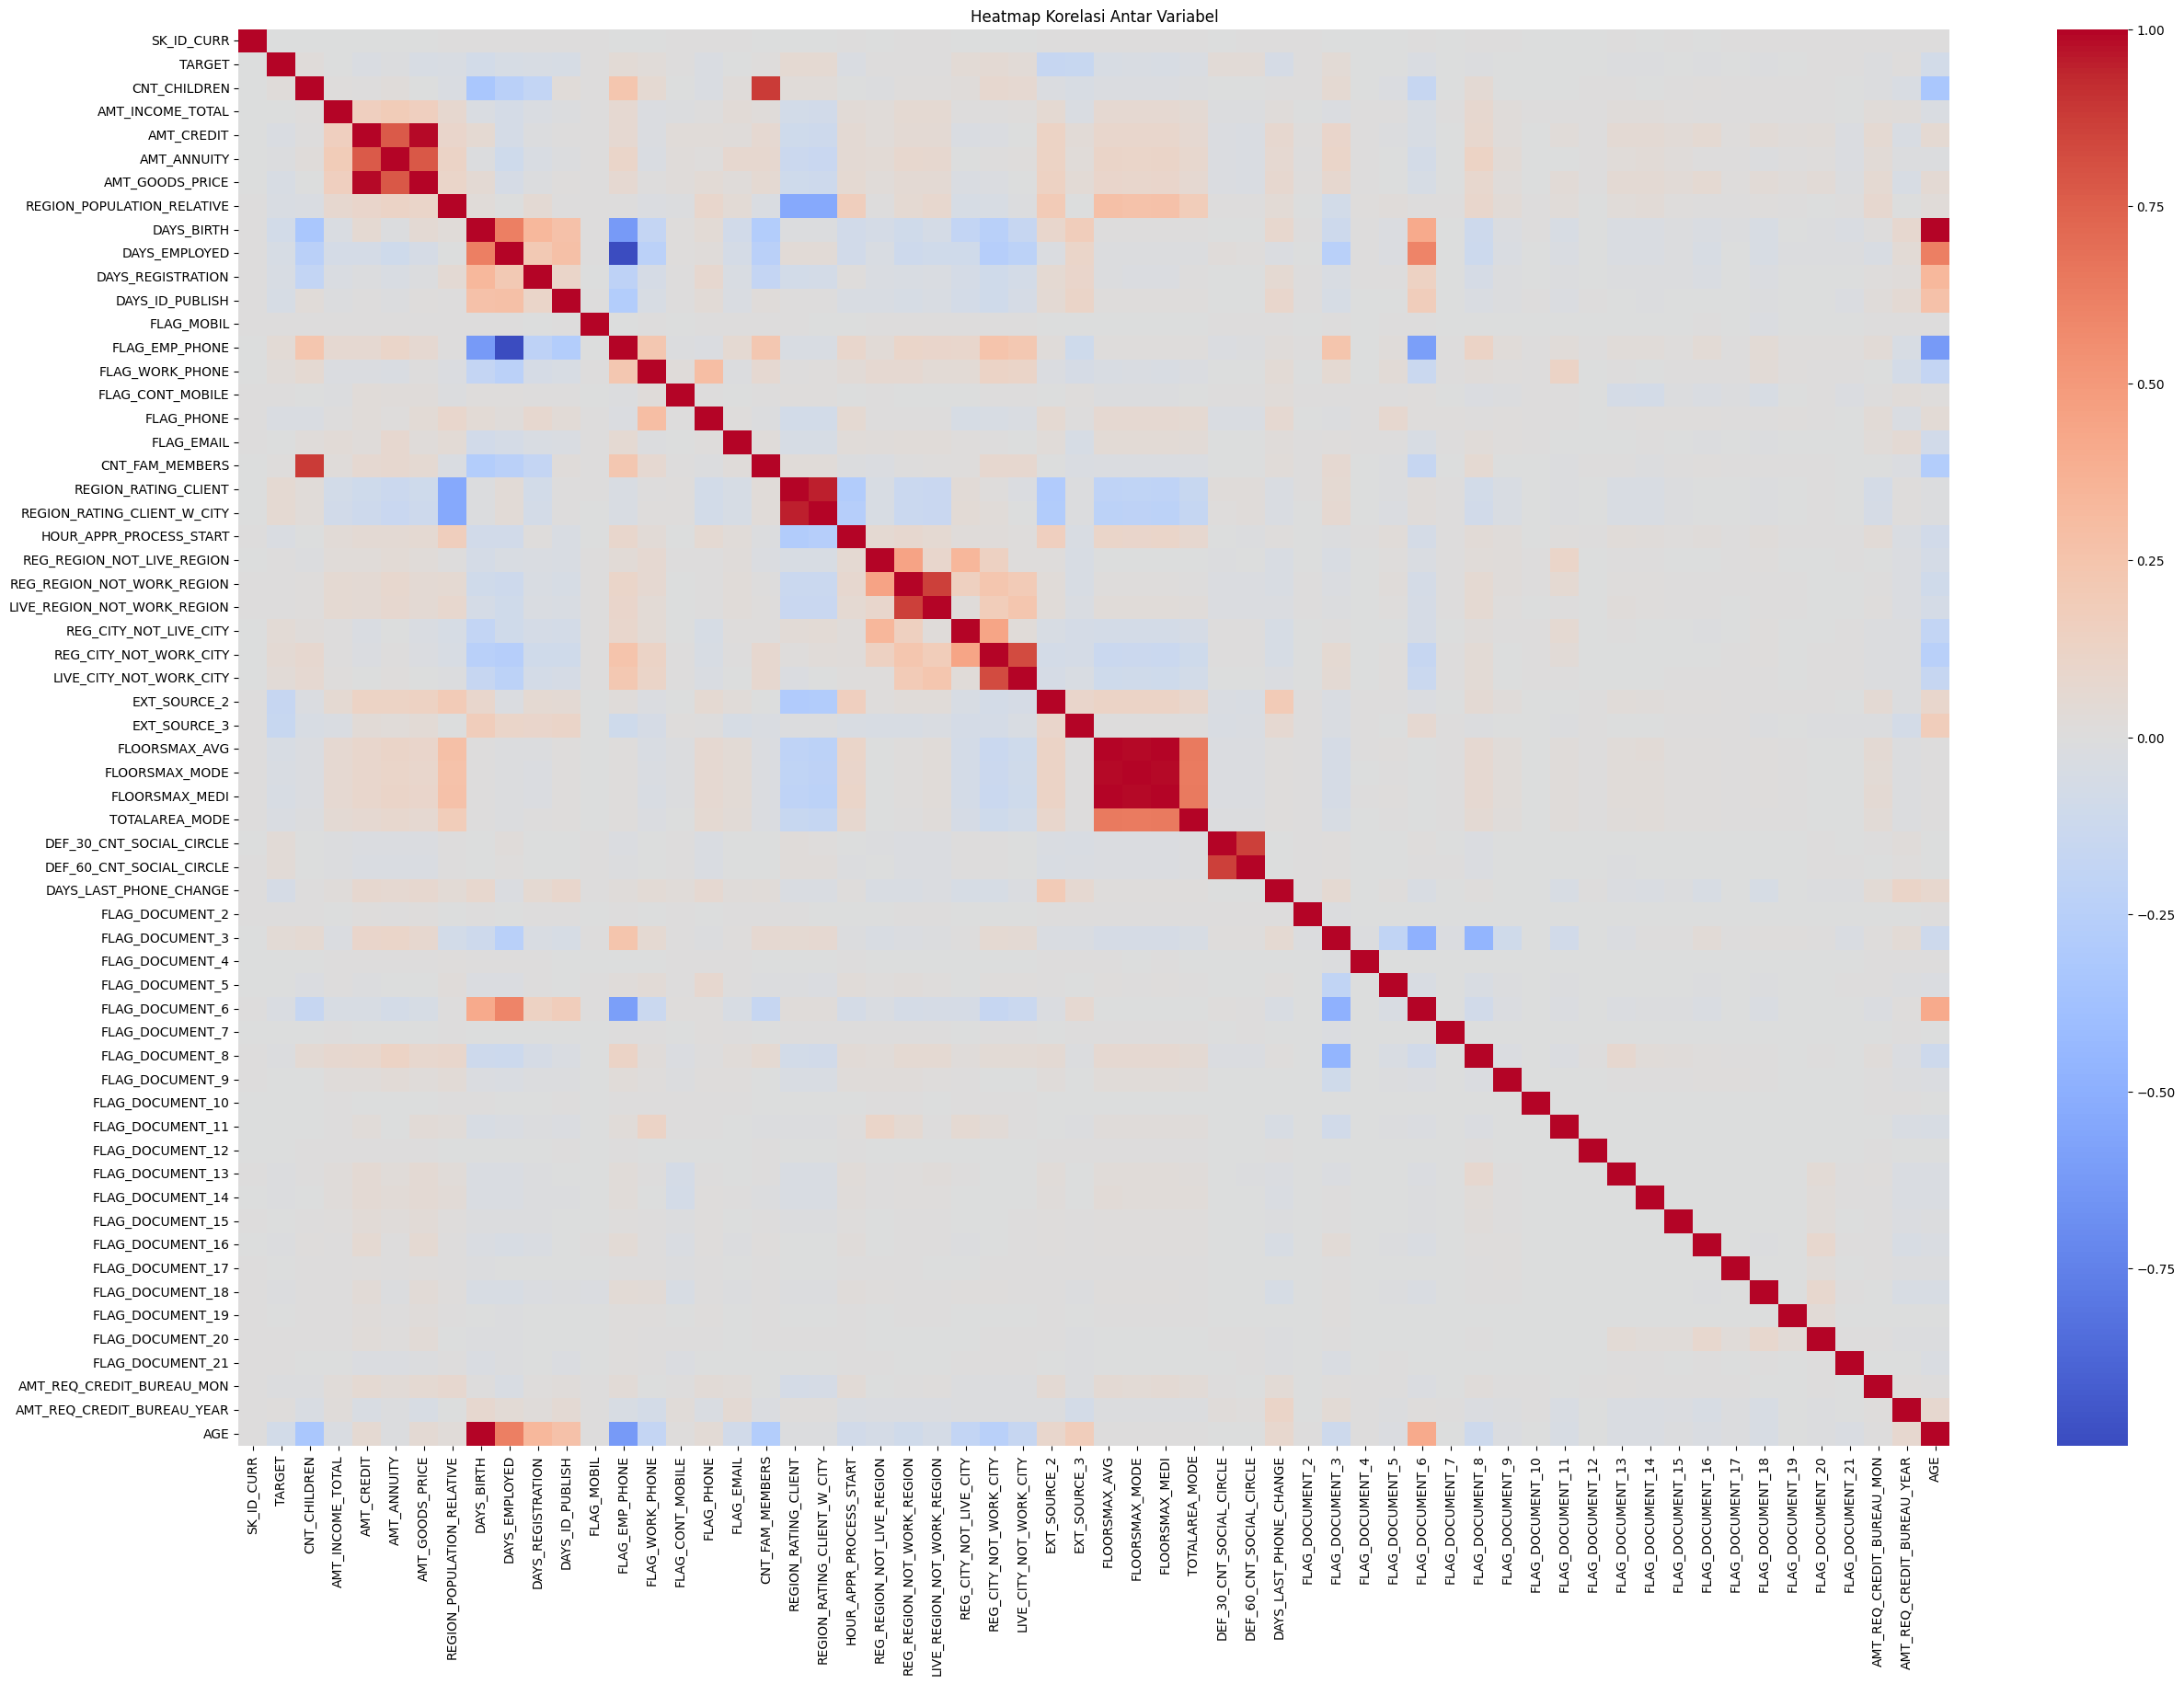

In [ ]:
# Check correlation matrix using heatmap
plt.figure(figsize=(30, 20))
correlation_matrix = df_train.select_dtypes(include=['number']).corr()

sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

**Univariate Analysis: Number of Customers Based on Their Repayment Abilities**

In [ ]:
# Replace 0 and 1 with words to make it clear and easier
status = {0: 'No Payment Difficulties', 1:'Payment Difficulties'}
df_train['TARGET_DESC']= df_train['TARGET'].replace(status)

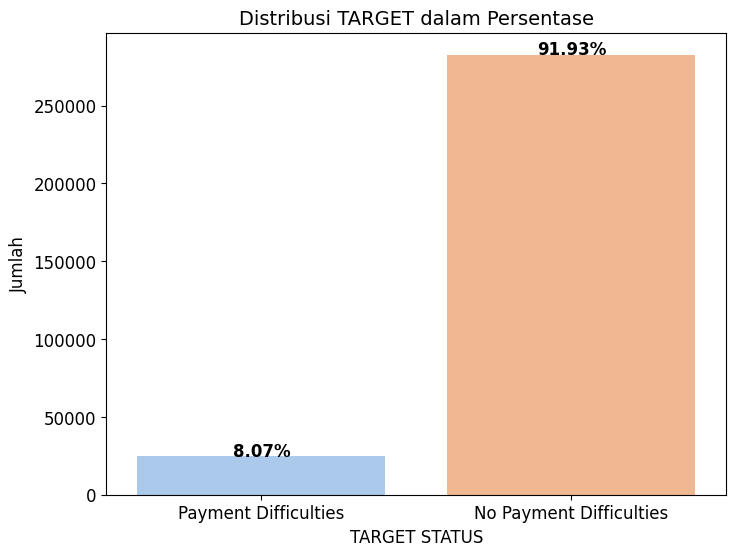

In [ ]:
# Using count plot to visualize the target distribution in percentage
total = len(df_train)

plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_train, x="TARGET_DESC", palette="pastel")

for p in ax.patches:
    percentage = f"{100 * p.get_height() / total:.2f}%"
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 50,
             percentage, ha="center", fontsize=12, fontweight="bold")

plt.title("Distribusi TARGET dalam Persentase", fontsize=14)
plt.xlabel("TARGET STATUS", fontsize=12)
plt.ylabel("Jumlah", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**BIVARIATE ANALYSIS FOR CATEGORICAL COLUMN**

**Bivariate Analysis: Number of Customers Based on Their Contract Type and Gender**

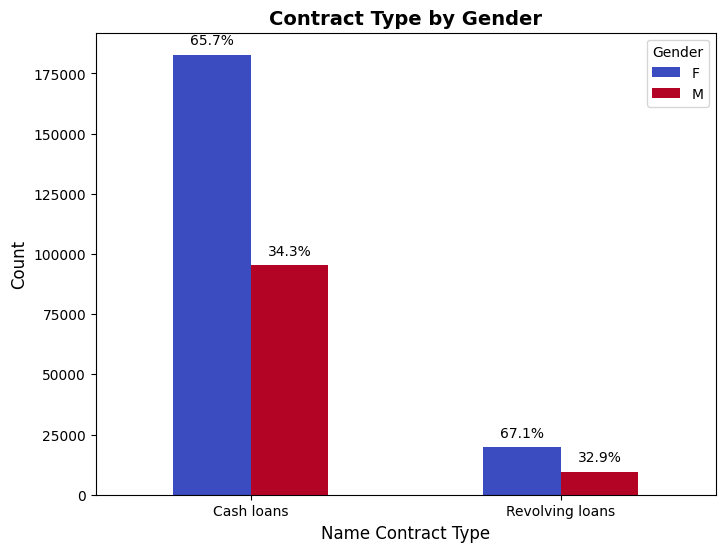

In [ ]:
contract_gender = df_train.groupby(['NAME_CONTRACT_TYPE', 'CODE_GENDER']).size().unstack()

axis = contract_gender.plot(kind='bar', figsize=(8, 6), colormap='coolwarm')
axis.set_xticklabels(axis.get_xticklabels(), rotation=0)

total = contract_gender.sum(axis=1)
for i, p in enumerate(axis.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    axis.annotate(f'{percentage:.1%}',
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                  textcoords='offset points')

plt.xlabel('Name Contract Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Contract Type by Gender', fontsize=14, fontweight='bold')
plt.legend(title='Gender')
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Contract Type**

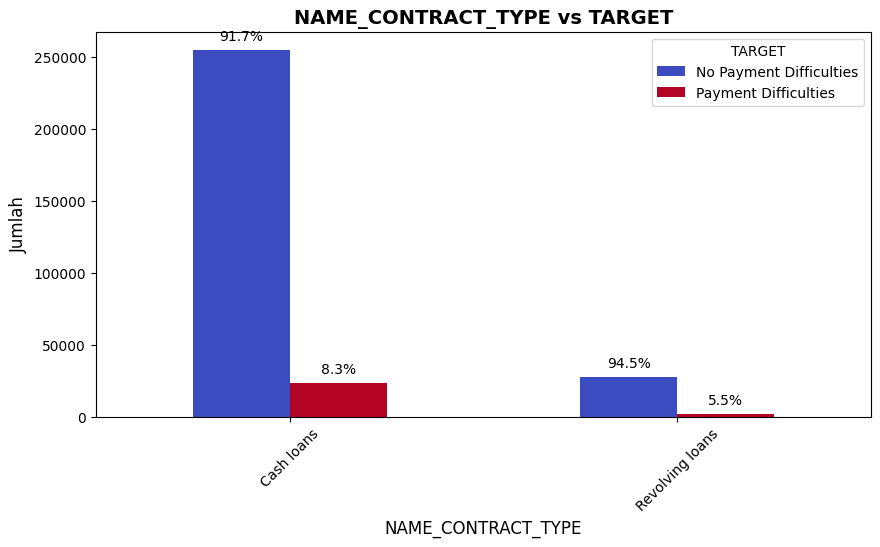

In [ ]:
contract_type_target = df_train.groupby(['NAME_CONTRACT_TYPE', 'TARGET_DESC']).size().unstack()

ax = contract_type_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

total = contract_type_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('NAME_CONTRACT_TYPE', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('NAME_CONTRACT_TYPE vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Gender**

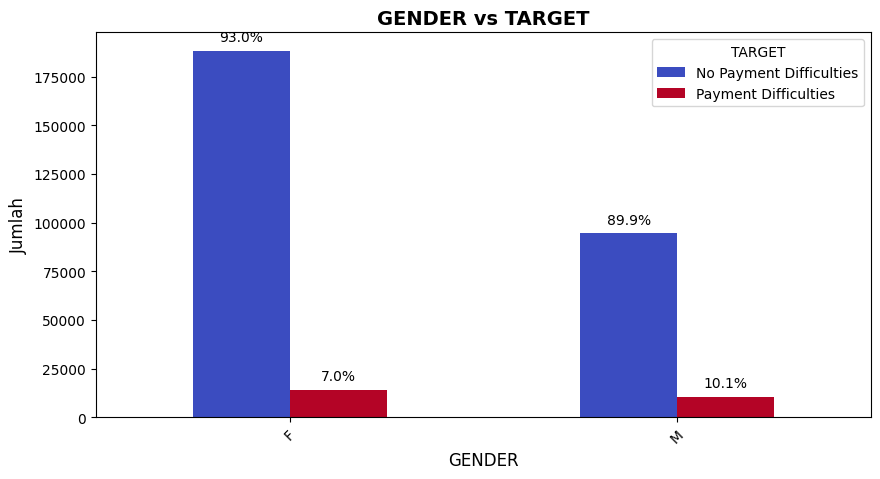

In [ ]:
gender_target = df_train.groupby(['CODE_GENDER', 'TARGET_DESC']).size().unstack()

ax = gender_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

total = gender_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('GENDER', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('GENDER vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Car Ownership Status**

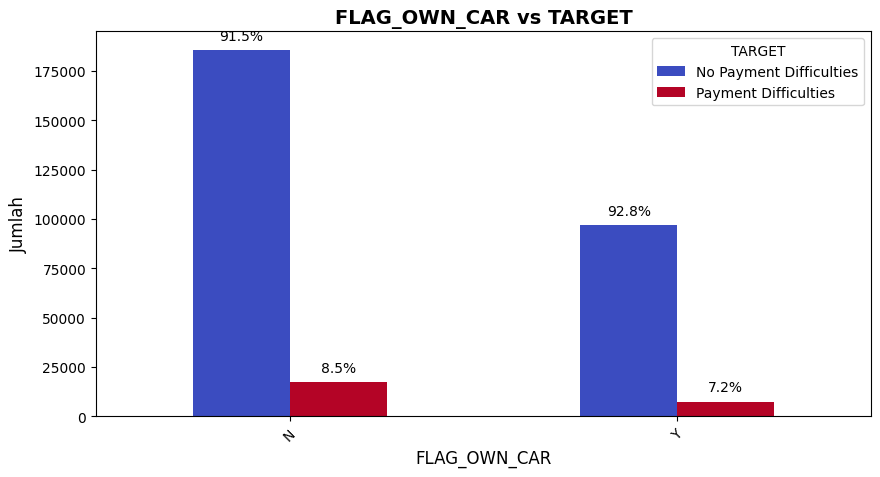

In [ ]:
own_car_target = df_train.groupby(['FLAG_OWN_CAR', 'TARGET_DESC']).size().unstack()

ax = own_car_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

total = own_car_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('FLAG_OWN_CAR', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('FLAG_OWN_CAR vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Realty Ownership Status**

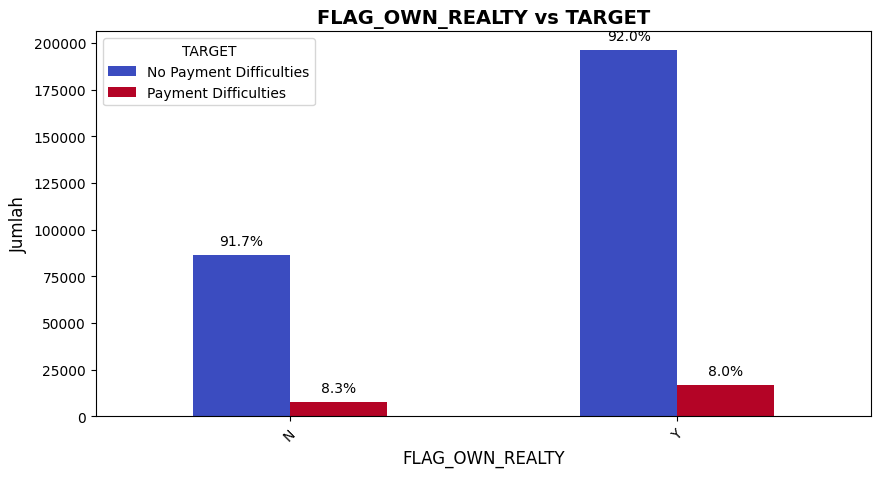

In [ ]:
own_realty_target = df_train.groupby(['FLAG_OWN_REALTY', 'TARGET_DESC']).size().unstack()

ax = own_realty_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

total = own_realty_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('FLAG_OWN_REALTY', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('FLAG_OWN_REALTY vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

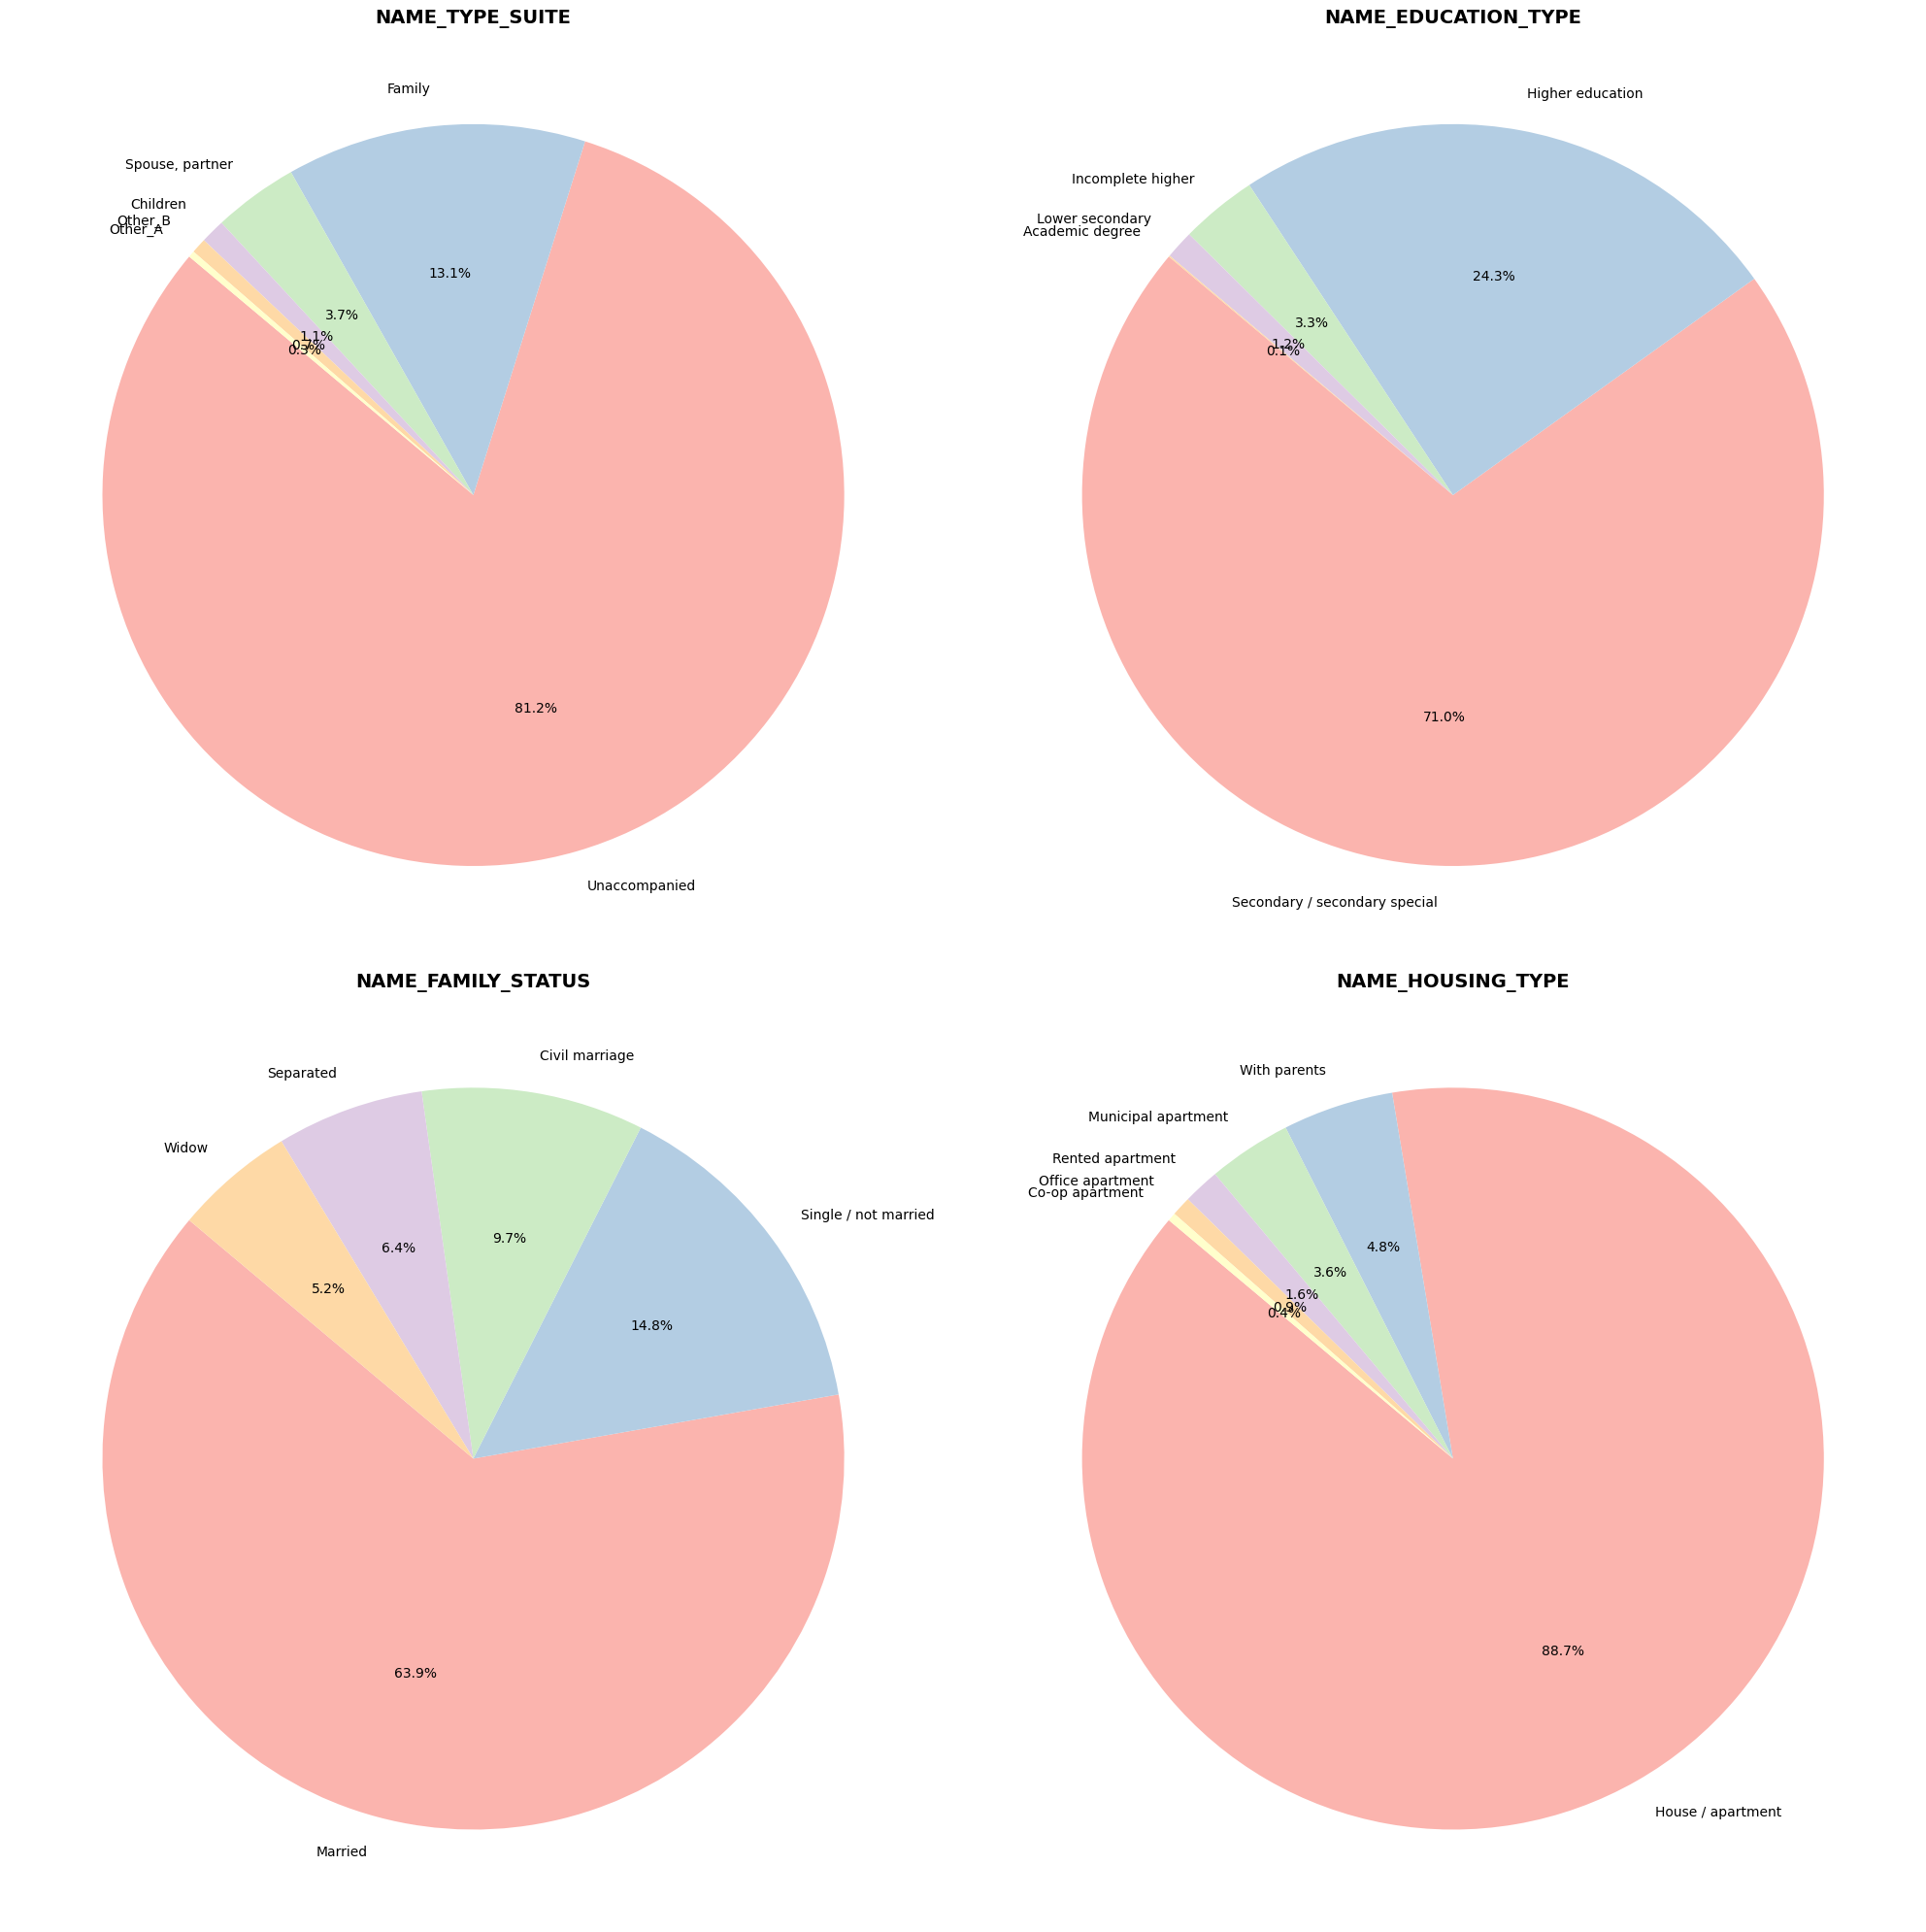

In [ ]:
# Check the proportion of each column below to see which is most interesting to analyze
features = ['NAME_TYPE_SUITE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

for i, feature in enumerate(features[:4]):
    ax = axes[i // 2, i % 2]
    data = df_train[feature].value_counts()

    ax.pie(data, labels=data.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
    ax.set_title(feature, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Educational Type**

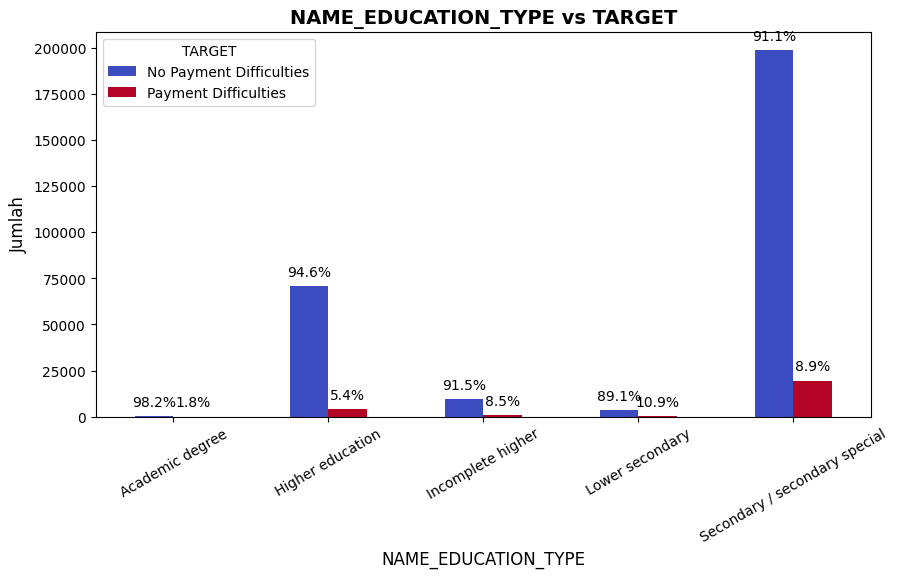

In [ ]:
education_type_target = df_train.groupby(['NAME_EDUCATION_TYPE', 'TARGET']).size().unstack()

ax = education_type_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

total = education_type_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('NAME_EDUCATION_TYPE', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('NAME_EDUCATION_TYPE vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Family Status**

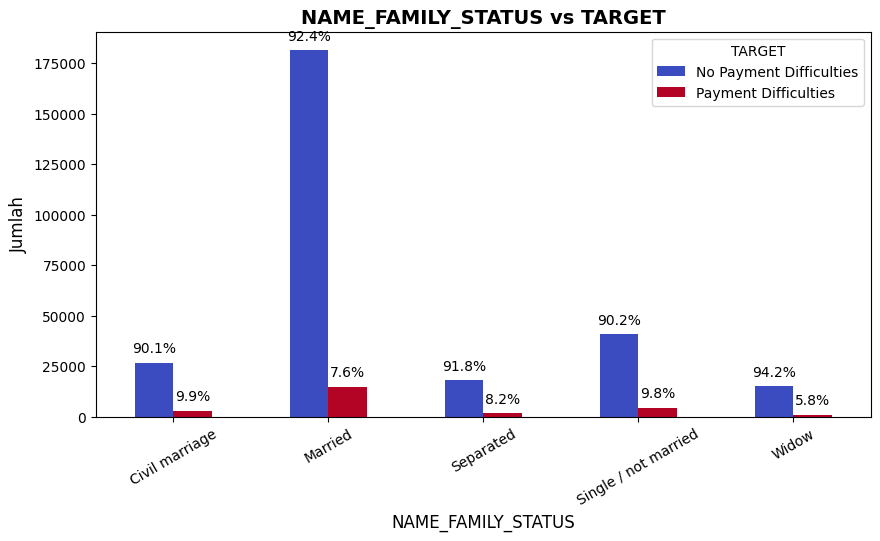

In [ ]:
family_status_target = df_train.groupby(['NAME_FAMILY_STATUS', 'TARGET']).size().unstack()

ax = family_status_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

total = family_status_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('NAME_FAMILY_STATUS', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('NAME_FAMILY_STATUS vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Housing Type**

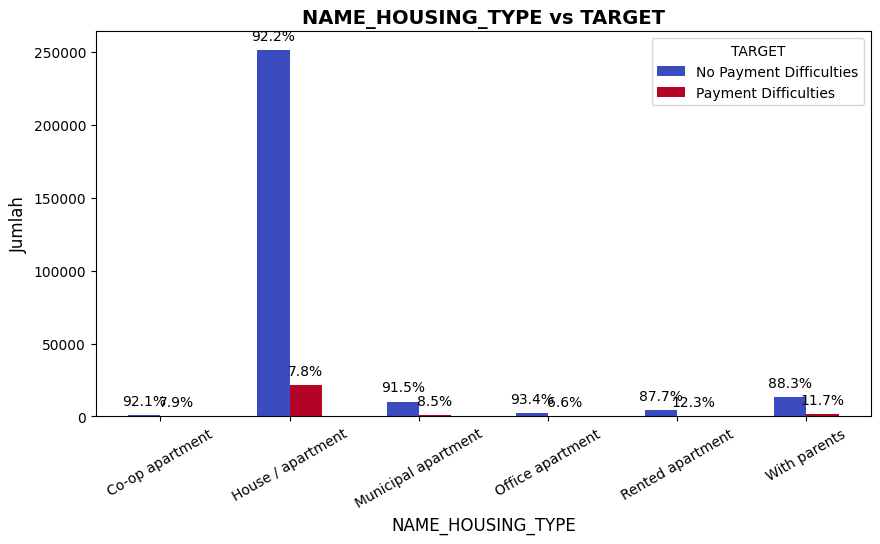

In [ ]:
housing_type_target = df_train.groupby(['NAME_HOUSING_TYPE', 'TARGET_DESC']).size().unstack()

ax = housing_type_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

total = housing_type_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('NAME_HOUSING_TYPE', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('NAME_HOUSING_TYPE vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Income Type**

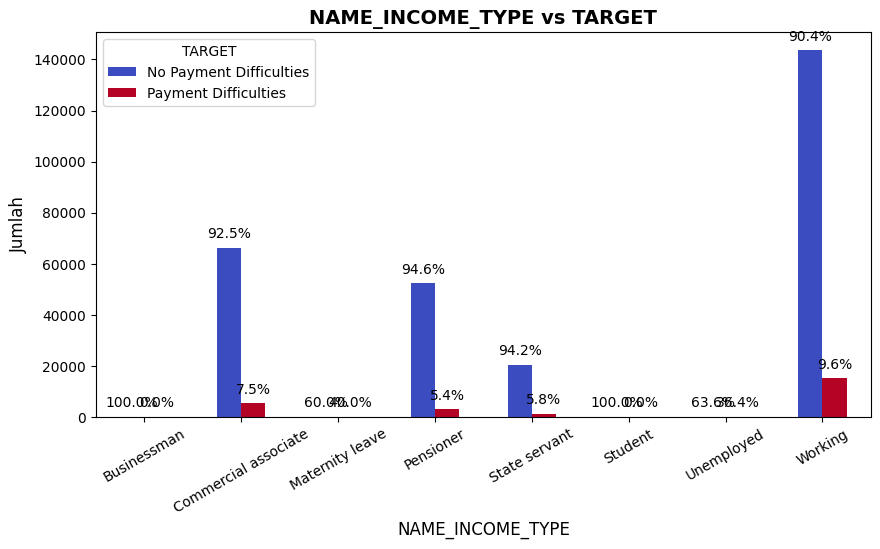

In [ ]:
income_type_target = df_train.groupby(['NAME_INCOME_TYPE', 'TARGET_DESC']).size().unstack()

ax = income_type_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

total = income_type_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('NAME_INCOME_TYPE', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('NAME_INCOME_TYPE vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Process Day**

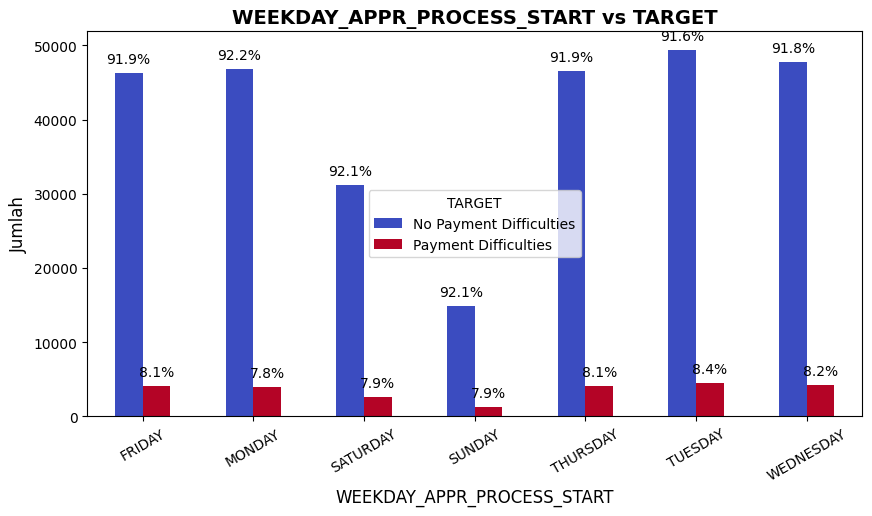

In [ ]:
weekday_process_target = df_train.groupby(['WEEKDAY_APPR_PROCESS_START', 'TARGET_DESC']).size().unstack()

ax = weekday_process_target.plot(kind='bar', figsize=(10, 5), colormap='coolwarm')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

total = weekday_process_target.sum(axis=1)
for i, p in enumerate(ax.patches):
    index = i % len(total)
    percentage = p.get_height() / total[index] if total[index] > 0 else 0
    ax.annotate(f'{percentage:.1%}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('WEEKDAY_APPR_PROCESS_START', fontsize=12)
plt.ylabel('Jumlah', fontsize=12)
plt.title('WEEKDAY_APPR_PROCESS_START vs TARGET', fontsize=14, fontweight='bold')
plt.legend(title='TARGET', labels=['No Payment Difficulties', 'Payment Difficulties'])
plt.show()

**BIVARIATE ANALYSIS FOR NUMERICAL COLUMN**

In [ ]:
no_age = df_train[df_train['TARGET']==0]['DAYS_BIRTH'].values/365
yes_age = df_train[df_train['TARGET']==1]['DAYS_BIRTH'].values/365

**Bivariate Analysis: Number of Clients Repayment Abilities By Age Interval**

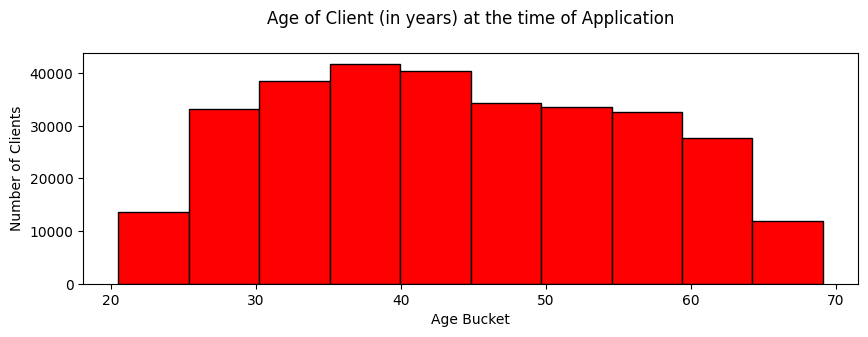

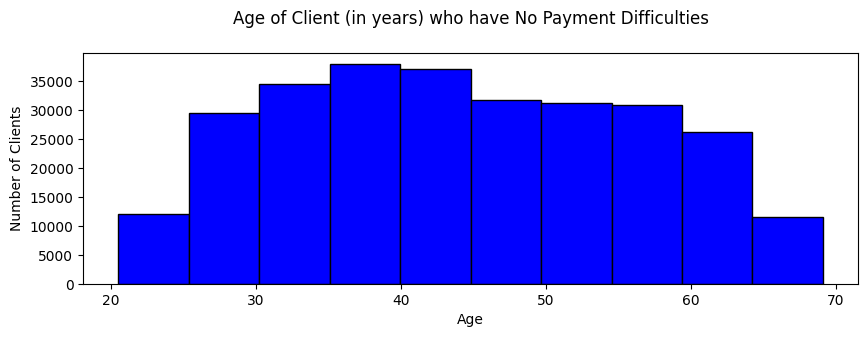

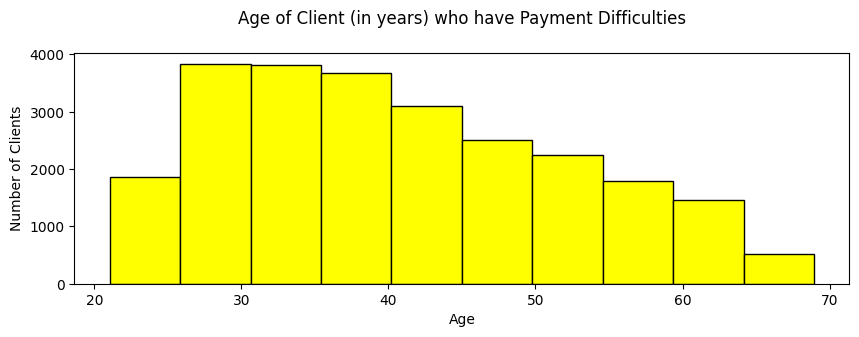

In [ ]:
plt.figure(figsize=(10,3))
plt.hist(df_train['DAYS_BIRTH'].values/365, bins=10, edgecolor='black', color='red')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='blue')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='yellow')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Amount Credit of Loan**

TARGET_DESC
No Payment Difficulties    517788.0
Payment Difficulties       497520.0
Name: AMT_CREDIT, dtype: float64


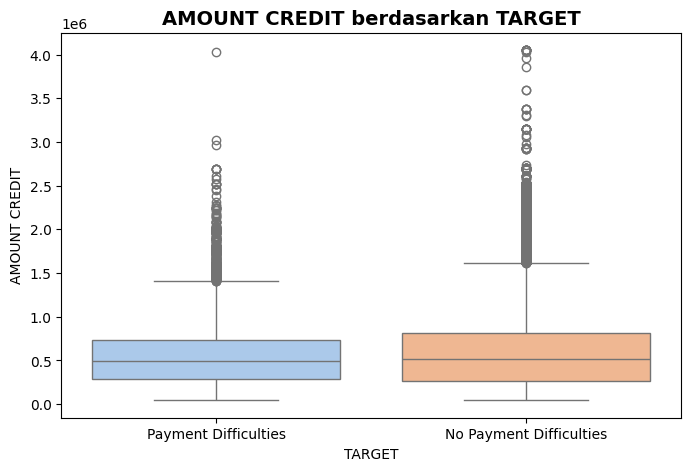

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x='TARGET_DESC', y='AMT_CREDIT', palette='pastel')

plt.title('AMOUNT CREDIT berdasarkan TARGET', fontsize=14, fontweight='bold')
plt.xlabel('TARGET')
plt.ylabel('AMOUNT CREDIT')

medians = df_train.groupby('TARGET_DESC')['AMT_CREDIT'].median()
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.1f}', horizontalalignment='center',
            verticalalignment='bottom', fontsize=10, fontweight='bold',
            color='black', bbox=dict(facecolor='white', edgecolor='black',
            boxstyle='round,pad=0.3'))
print(medians)
plt.show()

**Bivariate Analysis: Number of Clients Repayment Abilities By Total Amount Income**

TARGET_DESC
No Payment Difficulties    148500.0
Payment Difficulties       135000.0
Name: AMT_INCOME_TOTAL, dtype: float64


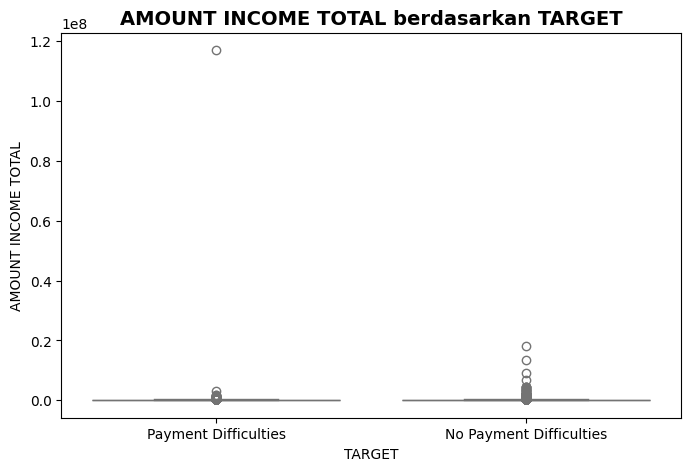

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df_train, x='TARGET_DESC', y='AMT_INCOME_TOTAL', palette='pastel')

plt.title('AMOUNT INCOME TOTAL berdasarkan TARGET', fontsize=14, fontweight='bold')
plt.xlabel('TARGET')
plt.ylabel('AMOUNT INCOME TOTAL')

medians = df_train.groupby('TARGET_DESC')['AMT_INCOME_TOTAL'].median()
for i, median in enumerate(medians):
    ax.text(i, median, f'{median:.1f}', horizontalalignment='center',
            verticalalignment='bottom', fontsize=10, fontweight='bold',
            color='black', bbox=dict(facecolor='white', edgecolor='black',
            boxstyle='round,pad=0.3'))
print(medians)
plt.show()

**MULTIVARIATE ANALYSIS**

**Multivariate Analysis: Income Type, Amount Credit of Loan, Target, and Contract Type**

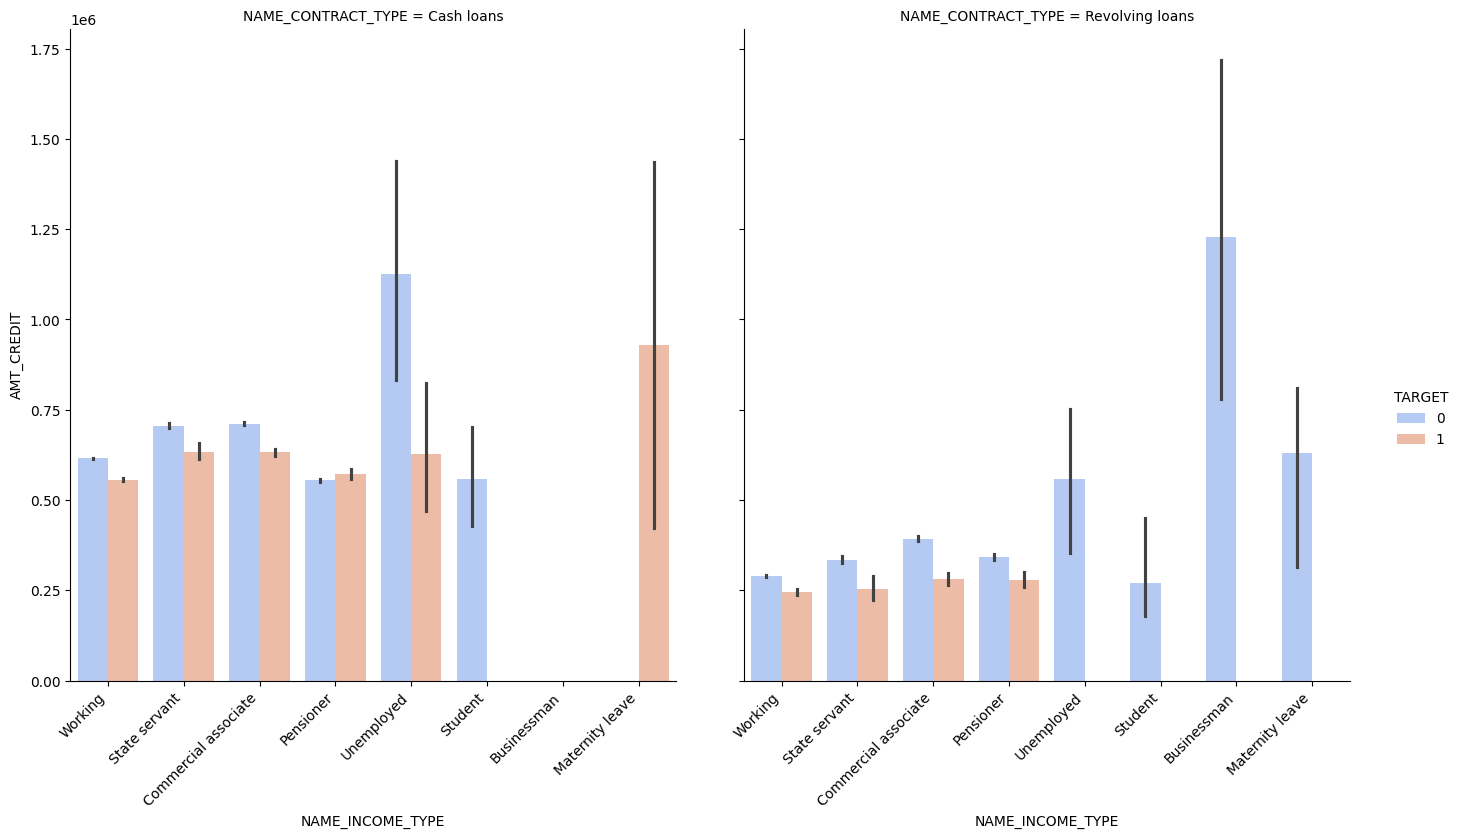

In [ ]:
fig = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT',
            hue = 'TARGET',
            col = 'NAME_CONTRACT_TYPE',
            kind = 'bar', palette = 'coolwarm',
            data = df_train)

fig.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

# **Business Insights**

1.   Around 8.1% of total borrowers, or approximately 25K clients, face challenges in repaying their loans.
2.   About 10% of the total of men had the problems repaying the loan compared to women clients (about 7%).
3.   The two types of loan contracts offered to clients are cash loans and revolving loans, with both being predominantly held by female clients—65.7% for cash loans and 67.1% for revolving loans.
4.   The majority of applications (218K) come from clients with a secondary education, followed by those with higher education (75K applications). However, clients with lower secondary education have the highest percentage for around 11% which indicates the repayment difficulties.
5.   Most loan applicants are between 35 and 40 years old, followed by those aged 40 to 45. Conversely, very few applications come from clients younger than 25 or older than 65. Clients aged 35-45 generally do not struggle with repayments, whereas those aged 25-35 are more likely to face difficulties.
6.   The median loan amount for clients without repayment issues is slightly higher than that of clients with difficulties, suggesting that those with larger loan amounts have a slightly better ability to repay compared to those with smaller loans.
7.   Clients with and without repayment issues generally have similar income values. However, as income increases, the likelihood of successfully repaying loans also improves.
8.   Among clients on maternity leave with cash loans, all face repayment difficulties for medium credit amounts, whereas those with revolving loans have no such issues. More than half of unemployed clients with cash loans struggle with repayment on medium credit amounts, while all unemployed clients with revolving loans repay without problems. Additionally, all student clients manage to repay their loans, whether cash or revolving, for low to medium credit amounts.

# **Data Preprocessing**

In [ ]:
# Checking duplicated data
df_train.duplicated().sum()

np.int64(0)

In [ ]:
# Copy df_train in order to make experiment using the df_train_copy variables
df_train_copy = df_train.copy()

In [ ]:
# Drop the TARGET_DESC column because it will not use again and avoid bias in the prediction
df_train_copy.drop(['TARGET_DESC'], inplace= True,axis=1)

In [ ]:
# Filter categorical column for encoding process
categorical_columns = df_train_copy.select_dtypes(exclude= 'number').columns.tolist()
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

In [ ]:
# Encode all the categorical column using LabelEncoder because i will make the target column of its distribution to be balanced
df_train_copy[categorical_columns] = df_train_copy[categorical_columns].apply(LabelEncoder().fit_transform)

In [ ]:
# Drop unimportant column
df_train_copy.drop(['SK_ID_CURR'], inplace= True,axis=1)

In [ ]:
# Drop TARGET column in y variable
X = df_train_copy.drop(['TARGET'], axis=1)
y = df_train_copy['TARGET']

In [ ]:
# Doing feature selection process to get the best 20 column by sorting it using score and p-value

features_selected= SelectKBest(score_func= chi2, k=10)
fit= features_selected.fit(X,y)
df_scores= pd.DataFrame(fit.scores_)
df_pvalues= pd.DataFrame(fit.pvalues_)
df_columns= pd.DataFrame(X.columns)

feature_scores= pd.concat([df_columns, df_scores, df_pvalues], axis=1)
feature_scores.columns= ['Features', 'Score', 'P-Value']

print('The features that correlate well with target feature:\n')
feature_scores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



Features         Score   P-Value
16       DAYS_EMPLOYED  1.954124e+08  0.000000
8      AMT_GOODS_PRICE  1.223080e+08  0.000000
6           AMT_CREDIT  7.669987e+07  0.000000
15          DAYS_BIRTH  2.235391e+06  0.000000
5     AMT_INCOME_TOTAL  1.624102e+06  0.000000
..                 ...           ...       ...
12  NAME_FAMILY_STATUS  5.413775e-02  0.816014
51     FLAG_DOCUMENT_5  3.020010e-02  0.862037
66    FLAG_DOCUMENT_20  1.425955e-02  0.904948
22    FLAG_CONT_MOBILE  7.863447e-05  0.992925
19          FLAG_MOBIL  2.855786e-07  0.999574

[71 rows x 3 columns]

In [ ]:
# Making the imbalanced distribution of TARGET values to be balanced between each other using resample
df_majority = df_train_copy[(df_train_copy['TARGET']==0)]
df_minority = df_train_copy[(df_train_copy['TARGET']==1)]

df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples= 282686,
                                 random_state=42)

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled['TARGET'].value_counts()

TARGET
1    282686
0    282686
Name: count, dtype: int64

In [ ]:
# Select top 20 column based on the score for the training process
feature_scores_sorted = feature_scores.sort_values(by=['Score'], ascending=False)
top_twenty_var = feature_scores_sorted['Features'].head(20).tolist()

In [ ]:
# Making the X to be re-arrange using the top 20 column
X_balanced = df_upsampled[top_twenty_var]
y_balanced = df_upsampled['TARGET']

In [ ]:
# Splitting the training and testing data by 80 and 20%
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
# Make sure to check again the shape
print(f"{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(452297, 20)
(113075, 20)
(452297,)
(113075,)


In [ ]:
# I will do the scaling process after splitting the data in order to avoid data leakage and overfitting,
# so the testing data will perform better and not affect by the training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

---

# **Machine Learning Model**

# 1. Logistic Regression

In [ ]:
# Building Logistic Regression Model
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Grid Search
grid_search_lr = GridSearchCV(logreg_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Training data using LR model
grid_search_lr.fit(X_train, y_train)
y_train_pred_lr = grid_search_lr.predict(X_train)

# Result for LR training model
print(classification_report(y_train, y_train_pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226185
           1       0.68      0.66      0.67    226112

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



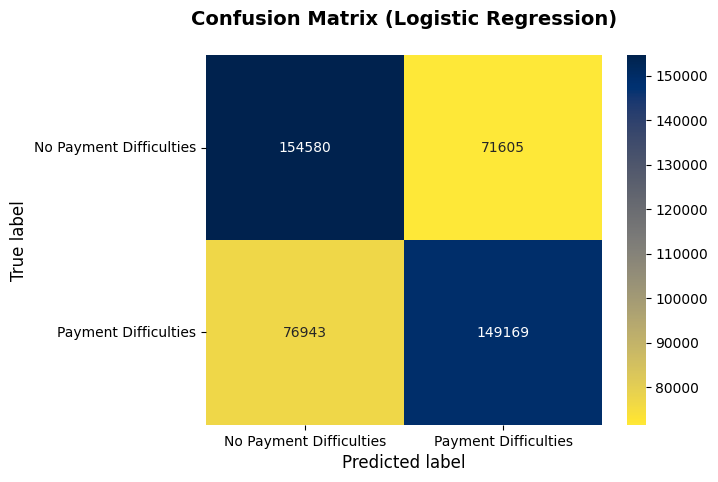

In [ ]:
# Plot the confusion matrix for the LR training model
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_train, y_train_pred_lr)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Logistic Regression)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Testing data using LR model
y_test_pred_lr = grid_search_lr.predict(X_test)

# Result for LR testing model
print(classification_report(y_test, y_test_pred_lr))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68     56501
           1       0.68      0.66      0.67     56574

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



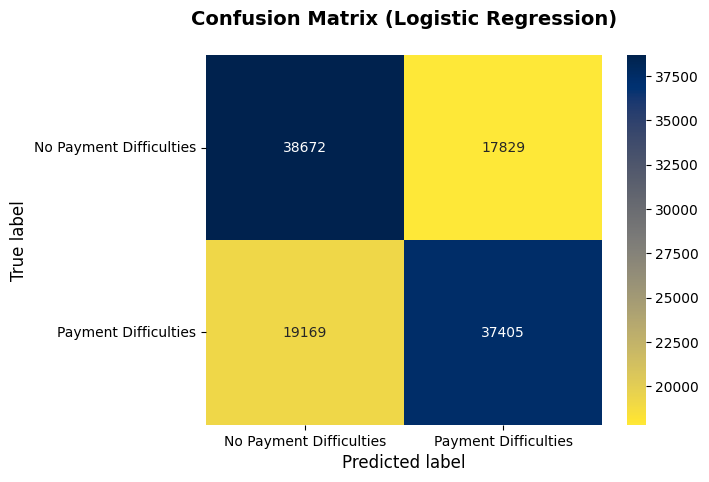

In [ ]:
# Plot the confusion matrix for the LR testing model
confusion_matrix_lr = pd.DataFrame((confusion_matrix(y_test, y_test_pred_lr)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_lr, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Logistic Regression)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Checking the accuracy both for the LR training and testing model
acc_log_train=round(grid_search_lr.score(X_train,y_train)*100,2)
acc_log_test=round(grid_search_lr.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 73.19
Test Accuracy: % 73.23


In [ ]:
# Checking the ROC-AUC for the LR testing model
roc_auc_lr = round(roc_auc_score(y_test, y_test_pred_lr),5)
print('ROC AUC:', roc_auc_lr)

ROC AUC: 0.67281


# 2. Random Forest

In [ ]:
# Building Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Grid Search
rf_grid = GridSearchCV(rf_model, rf_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Training data using RF model
rf_grid.fit(X_train, y_train)
best_rf = rf_grid.best_estimator_

y_train_pred_rf = best_rf.predict(X_train)

# Result for RF training model
print(classification_report(y_train, y_train_pred_rf))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    226185
           1       0.96      1.00      0.98    226112

    accuracy                           0.98    452297
   macro avg       0.98      0.98      0.98    452297
weighted avg       0.98      0.98      0.98    452297



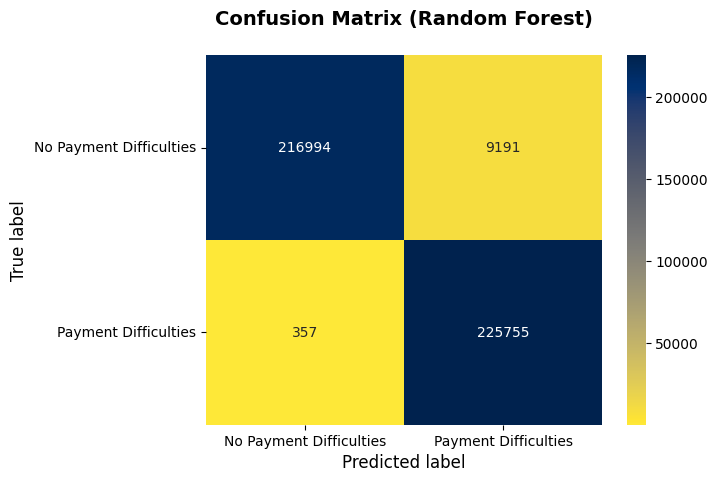

In [ ]:
# Plot the confusion matrix for the RF training model
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Random Forest)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Testing data using RF model
y_test_pred_rf = best_rf.predict(X_test)

# Result for RF testing model
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     56501
           1       0.93      0.99      0.96     56574

    accuracy                           0.96    113075
   macro avg       0.96      0.96      0.96    113075
weighted avg       0.96      0.96      0.96    113075



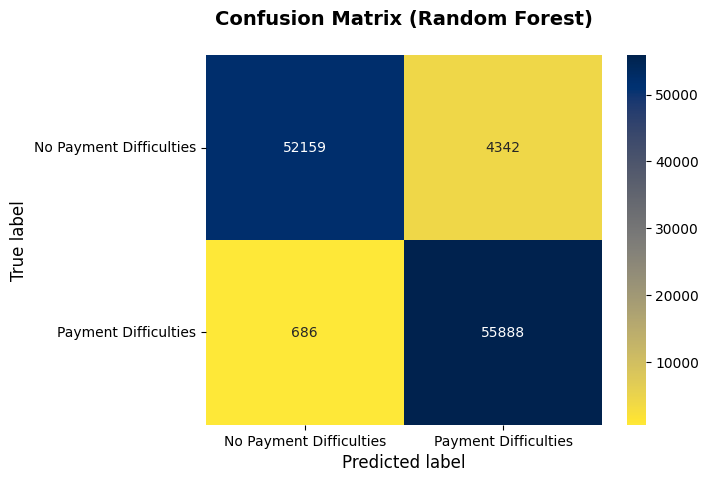

In [ ]:
# Plot the confusion matrix for the RF testing model
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Random Forest)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Checking the accuracy both for the RF training and testing model
acc_rf_train=round(best_rf.score(X_train,y_train)*100,2)
acc_rf_test=round(best_rf.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 97.89
Test Accuracy: % 95.55


In [ ]:
# Checking the ROC-AUC for the RF testing model
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),5)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.95551


# 3. Gradient Boosting

In [ ]:
# Building Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)

# Hyperparameter grid
gbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# Grid Search
gbm_grid = GridSearchCV(gb_model, gbm_params, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2)

# Training data using GB model
gbm_grid.fit(X_train, y_train)
best_gbm = gbm_grid.best_estimator_

y_train_pred_gbm = best_gbm.predict(X_train)

# Result for GB training model
print(classification_report(y_train, y_train_pred_gbm))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
              precision    recall  f1-score   support

           0       0.72      0.71      0.71    226185
           1       0.71      0.72      0.72    226112

    accuracy                           0.71    452297
   macro avg       0.71      0.71      0.71    452297
weighted avg       0.71      0.71      0.71    452297



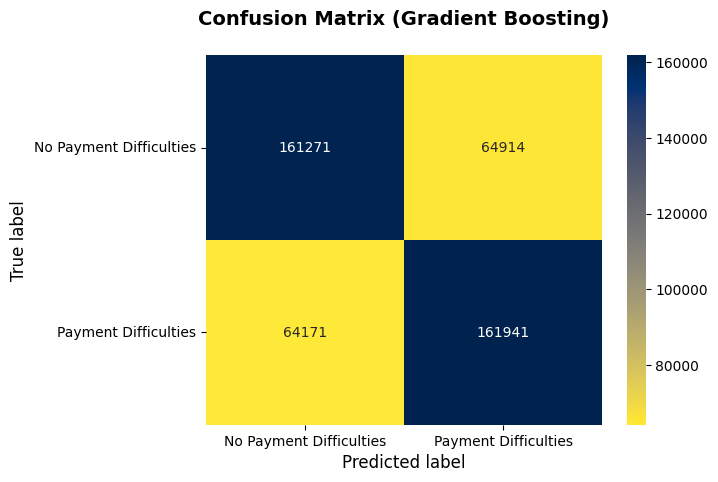

In [ ]:
# Plot the confusion matrix for the GB training model
confusion_matrix_gbm = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gbm)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_gbm, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Gradient Boosting)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Testing data using GB model
y_test_pred_gbm = best_gbm.predict(X_test)

# Result for GB testing model
print(classification_report(y_test, y_test_pred_gbm))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71     56501
           1       0.71      0.68      0.69     56574

    accuracy                           0.70    113075
   macro avg       0.70      0.70      0.70    113075
weighted avg       0.70      0.70      0.70    113075



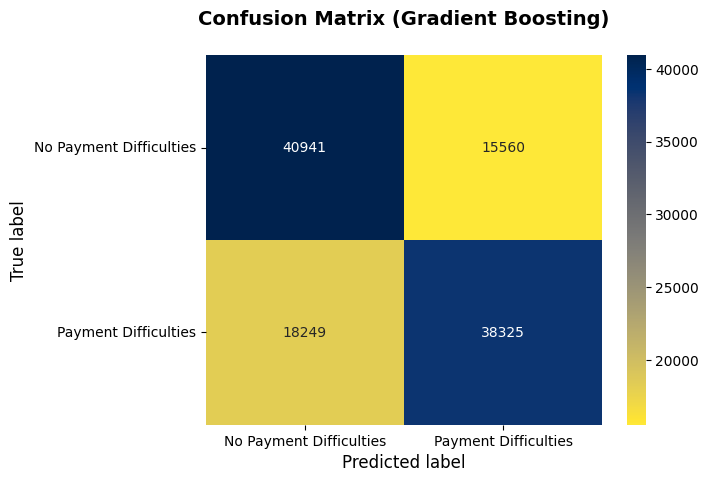

In [ ]:
# Plot the confusion matrix for the GB testing model
confusion_matrix_gbm = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gbm)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_gbm, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (Gradient Boosting)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Checking the accuracy both for the GB training and testing model
acc_gbm_train=round(best_gbm.score(X_train,y_train)*100,2)
acc_gbm_test=round(best_gbm.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_gbm_train))
print("Test Accuracy: % {}".format(acc_gbm_test))

Training Accuracy: % 71.46
Test Accuracy: % 70.1


In [ ]:
# Checking the ROC-AUC for the GB testing model
roc_auc_gbm = round(roc_auc_score(y_test, y_test_pred_gbm),5)
print('ROC AUC:', roc_auc_gbm)

ROC AUC: 0.70102


# 4. K-Nearest Neighbors

In [ ]:
# Building K-Nearest Neighbors Model
knn_model = KNeighborsClassifier()

# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9, 11],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan', 'minkowski']
# }

# knn_grid = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)

# Training data using KNN model
knn_model.fit(X_train, y_train)
# best_knn = knn_grid.best_estimator_

y_train_pred_knn = knn_model.predict(X_train)

# Result for KNN training model
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91    226185
           1       0.86      1.00      0.92    226112

    accuracy                           0.92    452297
   macro avg       0.93      0.92      0.92    452297
weighted avg       0.93      0.92      0.92    452297



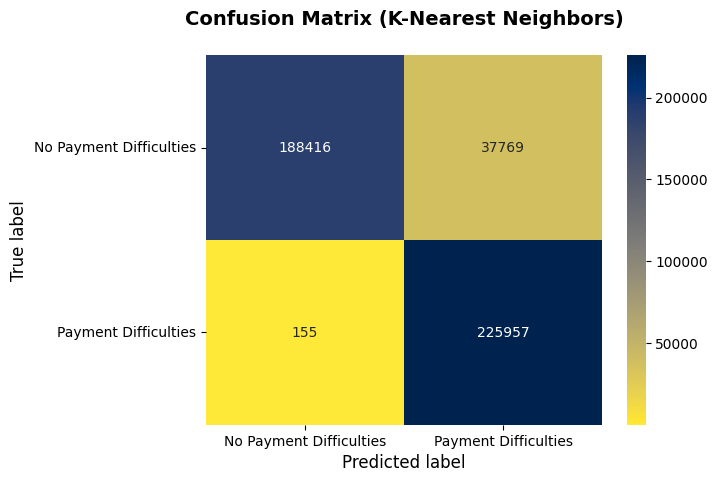

In [ ]:
# Plot the confusion matrix for the KNN training model
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (K-Nearest Neighbors)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Testing data using KNN model
y_test_pred_knn = knn_model.predict(X_test)

# Result for KNN testing model
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.77      0.87     56501
           1       0.81      1.00      0.89     56574

    accuracy                           0.88    113075
   macro avg       0.90      0.88      0.88    113075
weighted avg       0.90      0.88      0.88    113075



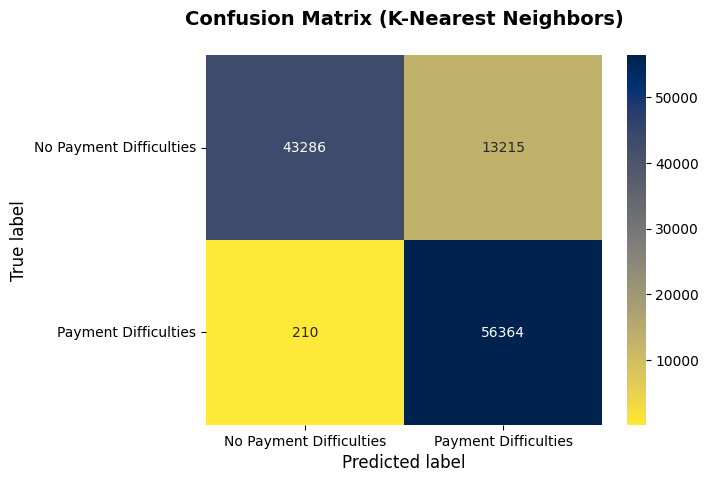

In [ ]:
# Plot the confusion matrix for the KNN testing model
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'),
                                    ('No Payment Difficulties', 'Payment Difficulties'))

plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 10}, fmt='d', cmap='cividis_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)

plt.title('Confusion Matrix (K-Nearest Neighbors)\n', fontsize=14, color='black', weight='bold')
plt.ylabel('True label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.show()

In [ ]:
# Checking the accuracy both for the KNN training and testing model
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 91.62
Test Accuracy: % 88.13


In [ ]:
# Checking the ROC-AUC for the KNN testing model
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),5)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.8812


# **Best ML Model Selection**

In [ ]:
# Sorting the best model based on the training, testing, and roc-auc score
results = pd.DataFrame([["Logistic Regression", 0.7319, 0.7323, 0.6728],["Random Forest", 0.9789, 0.9555, 0.9555],
                       ["Gradient Boosting", 0.7146, 0.701, 0.7010],["K-Nearest Neighbor", 0.9162, 0.8813, 0.8812]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC-AUC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

Get the best model which is the Random Forest Model. The minimum difference between its training and testing accuracy score has indicated that this model perform with no underfitting neither overfitting. Next, i will use this RF model to predict the application_test dataset.

# **Load Dataset Test**

I will do the same treatment and handling to test dataset as i have done before with the train dataset.

In [ ]:
df_test = pd.read_csv("/content/sample_data/application_test.csv")
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 121 columns]

In [ ]:
df_test.shape

(48744, 121)

# **Checking Missing Values(Test)**

In [ ]:
def drop_columns(df):
    missing_value_perc = (df_test.isnull().sum() / df_test.shape[0]) * 100
    filtering_drop = missing_value_perc[missing_value_perc > 50].index
    df = df.drop(columns = filtering_drop)
    return df

In [ ]:
df_test = drop_columns(df_test)
df_test.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100001         Cash loans           F            N               Y   
1      100005         Cash loans           M            N               Y   
2      100013         Cash loans           M            Y               Y   
3      100028         Cash loans           F            N               Y   
4      100038         Cash loans           M            Y               N   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   
3             2          315000.0   1575000.0      49018.5        1575000.0   
4             1          180000.0    625500.0      32067.0         625500.0   

   ... FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                0                0                0                0   
1  ...                0                0                0                0   
2  ...                0                0                0                0   
3  ...                0                0                0                0   
4  ...                0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        0.0                        0.0   
4                        NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         0.0  
1                        0.0                         3.0  
2                        1.0                         4.0  
3                        0.0                         3.0  
4                        NaN                         NaN  

[5 rows x 92 columns]

In [ ]:
df_test.duplicated().sum()

np.int64(0)

In [ ]:
missing_value_perc = (df_test.isnull().sum()/df_test.shape[0]) * 100
missing_value_perc

SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     12.409732
AMT_REQ_CREDIT_BUREAU_WEEK    12.409732
AMT_REQ_CREDIT_BUREAU_MON     12.409732
AMT_REQ_CREDIT_BUREAU_QRT     12.409732
AMT_REQ_CREDIT_BUREAU_YEAR    12.409732
Length: 92, dtype: float64

In [ ]:
filtering = (missing_value_perc > 0.0) & (missing_value_perc < 50.0)
filtered_values = filtering[filtering].index.tolist()

missing_perc = missing_value_perc[filtered_values].sort_values(ascending=False)

for col in missing_perc.index:
    print(f"{col} | {df_test[col].dtype} | {missing_perc[col]}")

WALLSMATERIAL_MODE | object | 49.017314951583785
APARTMENTS_AVG | float64 | 49.00500574429673
APARTMENTS_MEDI | float64 | 49.00500574429673
APARTMENTS_MODE | float64 | 49.00500574429673
HOUSETYPE_MODE | object | 48.45519448547513
ENTRANCES_MODE | float64 | 48.373133103561464
ENTRANCES_MEDI | float64 | 48.373133103561464
ENTRANCES_AVG | float64 | 48.373133103561464
LIVINGAREA_AVG | float64 | 48.317741670769735
LIVINGAREA_MODE | float64 | 48.317741670769735
LIVINGAREA_MEDI | float64 | 48.317741670769735
FLOORSMAX_MEDI | float64 | 47.84383719021829
FLOORSMAX_MODE | float64 | 47.84383719021829
FLOORSMAX_AVG | float64 | 47.84383719021829
YEARS_BEGINEXPLUATATION_MODE | float64 | 46.88987362547185
YEARS_BEGINEXPLUATATION_MEDI | float64 | 46.88987362547185
YEARS_BEGINEXPLUATATION_AVG | float64 | 46.88987362547185
TOTALAREA_MODE | float64 | 46.41391761037256
EMERGENCYSTATE_MODE | object | 45.56253077301822
EXT_SOURCE_1 | float64 | 42.12210733628755
OCCUPATION_TYPE | object | 32.014196619071065


In [ ]:
for col in filtered_numerical:
    median_value = df_test[col].median()
    df_test[col].fillna(median_value, inplace=True)

In [ ]:
df_test[col].isnull().sum()

np.int64(0)

In [ ]:
columns = ['OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_QRT', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI']
df_test = df_test.drop(columns=columns)

In [ ]:
missing_value_perc = (df_test.isnull().sum()/df_test.shape[0]) * 100
missing_value_perc

SK_ID_CURR                    0.0
NAME_CONTRACT_TYPE            0.0
CODE_GENDER                   0.0
FLAG_OWN_CAR                  0.0
FLAG_OWN_REALTY               0.0
                             ... 
FLAG_DOCUMENT_19              0.0
FLAG_DOCUMENT_20              0.0
FLAG_DOCUMENT_21              0.0
AMT_REQ_CREDIT_BUREAU_MON     0.0
AMT_REQ_CREDIT_BUREAU_YEAR    0.0
Length: 83, dtype: float64

In [ ]:
filtering = (missing_value_perc > 0.0) & (missing_value_perc < 50.0)
filtered_values = filtering[filtering].index.tolist()

missing_perc = missing_value_perc[filtered_values].sort_values(ascending=False)

for col in missing_perc.index:
    print(f"{col} | {df_test[col].dtype} | {missing_perc[col]}")

WALLSMATERIAL_MODE | object | 49.017314951583785
APARTMENTS_MODE | float64 | 49.00500574429673
APARTMENTS_AVG | float64 | 49.00500574429673
APARTMENTS_MEDI | float64 | 49.00500574429673
HOUSETYPE_MODE | object | 48.45519448547513
ENTRANCES_MODE | float64 | 48.373133103561464
ENTRANCES_AVG | float64 | 48.373133103561464
ENTRANCES_MEDI | float64 | 48.373133103561464
LIVINGAREA_MODE | float64 | 48.317741670769735
LIVINGAREA_MEDI | float64 | 48.317741670769735
LIVINGAREA_AVG | float64 | 48.317741670769735
EMERGENCYSTATE_MODE | object | 45.56253077301822
EXT_SOURCE_1 | float64 | 42.12210733628755
OCCUPATION_TYPE | object | 32.014196619071065
NAME_TYPE_SUITE | object | 1.8689479730838665


In [ ]:
filtered_categorical = df_test.select_dtypes(include=['object']).columns
filtered_categorical = [col for col in filtered_categorical if col in filtered_values]
filtered_categorical

['NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
for col in filtered_categorical:
    mode_value = df_test[col].mode()[0]
    df_test[col].fillna(mode_value, inplace=True)

In [ ]:
df_test.shape

(48744, 83)

# **Data Preparation(Test)**

In [ ]:
df_test['CODE_GENDER']= df_test['CODE_GENDER'].replace('XNA', 'F')

In [ ]:
df_test['NAME_TYPE_SUITE']= df_test['NAME_TYPE_SUITE'].replace('Group of people', 'Other_B')

In [ ]:
df_test['NAME_FAMILY_STATUS']= df_test['NAME_FAMILY_STATUS'].replace('Unknown', 'Married')

In [ ]:
df_test['DAYS_BIRTH'] = df_test['DAYS_BIRTH'].abs()
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].abs()
df_test['DAYS_REGISTRATION'] = df_test['DAYS_REGISTRATION'].abs()
df_test['DAYS_ID_PUBLISH'] = df_test['DAYS_ID_PUBLISH'].abs()
df_test['DAYS_LAST_PHONE_CHANGE'] = df_test['DAYS_LAST_PHONE_CHANGE'].abs()

df_test['AGE'] = (df_test['DAYS_BIRTH']/365).astype(int)

# **Data Preprocessing(Test)**

In [ ]:
categorical_columns = df_test.select_dtypes(exclude= 'number').columns.tolist()
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
df_test[categorical_columns] = df_test[categorical_columns].apply(LabelEncoder().fit_transform)

In [ ]:
prediction_test = df_test[top_twenty_var]

# **Implement Best ML Model for Dataset Test**

In [ ]:
pred = pd.Series(best_rf.predict(prediction_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], pred],axis = 1)
results.to_csv("predict-application_test.csv", index = False)
results.head(25)

SK_ID_CURR  TARGET
0       100001       0
1       100005       0
2       100013       0
3       100028       0
4       100038       0
5       100042       0
6       100057       0
7       100065       0
8       100066       0
9       100067       0
10      100074       0
11      100090       0
12      100091       0
13      100092       0
14      100106       0
15      100107       0
16      100109       0
17      100117       0
18      100128       0
19      100141       0
20      100150       0
21      100168       0
22      100169       0
23      100170       0
24      100171       0

# **Business Recommendation**



1.   Since younger clients (25-35 years old) and those with lower secondary education have higher loan repayment difficulties, Home Credit should implement stricter risk assessment measures for these groups. This could include offering smaller initial loan amounts, requiring financial literacy training, or providing flexible repayment plans to improve repayment success rates.
2.   Given that women hold the majority of loans and have a lower default rate than men, Home Credit could consider expanding loan programs specifically tailored for female borrowers. Offering incentives like lower interest rates or financial education programs could further enhance repayment rates and financial inclusion for women.
3.   Since repayment success improves with higher income, Home Credit should consider income-sensitive loan products. For example, unemployed clients and those on maternity leave should have customized repayment plans, such as deferred payments or income-adjusted installments, to reduce the likelihood of default while still allowing access to financial services.

